<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to create a model
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [360]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [361]:
iowa=pd.read_csv("/Users/mkrupoff/Desktop/ECON628-01-mnkrupoff/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv")

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [263]:
iowa.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [362]:
for i in iowa.columns:
    print "_____"
    print iowa[i].describe()
# print iowa["State Bottle Retail"].describe()
# print iowa["Bottle Volume (ml)"].describe()

_____
count         270955
unique           274
top       12/01/2015
freq            1555
Name: Date, dtype: object
_____
count    270955.000000
mean       3590.263701
std         947.662050
min        2106.000000
25%        2604.000000
50%        3722.000000
75%        4378.000000
max        9023.000000
Name: Store Number, dtype: float64
_____
count         270955
unique           385
top       DES MOINES
freq           23724
Name: City, dtype: object
_____
count     270955
unique       415
top        50010
freq        7091
Name: Zip Code, dtype: object
_____
count    269878.000000
mean         57.231642
std          27.341205
min           1.000000
25%                NaN
50%                NaN
75%                NaN
max          99.000000
Name: County Number, dtype: float64
_____
count     269878
unique        99
top         Polk
freq       49102
Name: County, dtype: object
_____
count    2.708870e+05
mean     1.043888e+06
std      5.018211e+04
min      1.011100e+06
25%              

In [4]:
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [3]:
iowa.isnull().sum()



Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [4]:
iowa["Sale (Dollars)"].describe()
#The sales data is a string, but we want it to be a float. Therefore, first we must remove the dollar sign, and then convert it to float.  

count      270955
unique       6580
top       $162.00
freq         3482
Name: Sale (Dollars), dtype: object

The first thing that is noticeable is that the monetary columns still have the dollar signs in them. The first step was then to remove these dollar signs. I then converted them to float.
Next I made sure that the volumes were all in gallons.
Next I renamed my columns in order to get rid of the unneccesary characters such as parenthese while knowing that the monetary values were in dollars, and the volumes were in gallons.
And finally I created separate columns for the year and the month.

In [363]:
#iowa["Bottle Volume (ml)"].apply(lambda x: x).astype(float)
iowa["Bottle Volume (gallons)"]=iowa["Bottle Volume (ml)"].apply(lambda x: (x*0.000264172)).astype(float)


### 3.2 Clean the columns

In [364]:
def remove_dollar(x):
    iowa[x] = iowa[x].str.replace('$', '').astype(float)

dollar_vars=["State Bottle Cost", "State Bottle Retail","Sale (Dollars)" ]
for i in dollar_vars:
    remove_dollar(i)


#http://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
iowa[["Sale (Dollars)", "State Bottle Cost", "State Bottle Retail"]].describe()


,Sale (Dollars),State Bottle Cost,State Bottle Retail
count,270955.000000,270955.000000,270955.000000
mean,128.902375,9.773281,14.675760
std,383.027369,7.047119,10.570145
min,1.340000,0.890000,1.340000
25%,30.450000,5.500000,8.270000
50%,70.560000,8.000000,12.270000
75%,135.000000,11.920000,17.880000
max,36392.400000,425.000000,637.500000


In [365]:

iowa.rename(columns={"Sale (Dollars)": "revenue",
             "State Bottle Retail": "bottle_price",
             "State Bottle Cost": "bottle_cost",
             "Volume Sold (Gallons)": "gallons_sold",
             "Volume Sold (Liters)": "liters_sold",
                     "Bottles Sold": "bottles_sold",
             }, inplace=True)
    




### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

To begin with, this dataset has a lot of outliers. There are stores that are abnormally large compared to the rest of the dataset, so in order to get a representative sample we should remove them. Likewise, there are a number of stores that are abnormally small and thus do not lend much for description. Here, I find the distribution, and the normalized distribution to get a sense of the range of outliers, and then I delete them from my dataset. 

In [411]:
columns=["City", "Zip Code","Item Number", "Item Description", "Bottle Volume (ml)", "liters_sold"]

def delete_columns(columns, df):
    for i in columns:
        df.drop(i,1, inplace=True)

        
    
delete_columns(columns, iowa)

In [398]:

store_size=iowa.groupby("Store Number")
total_gallons=store_size["gallons_sold"].apply(np.sum).values
total_gallons_mean=np.mean(yearly_gallons).values
total_gallons_std=np.std(yearly_gallons).values

#Annual total gallons sold by Store.


In [400]:
def histogram(var,title, ylab):
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()

    sns.distplot(var, bins=100, hist=True, kde=False,
                      ax=ax)

    ax.set_ylabel(ylab, fontsize=16)
    ax.set_title(title, fontsize=20)

    plt.show()
    

def boxplots( var, title, ylab):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()

    sns.boxplot(var, orient='v',
                fliersize=8, linewidth=1.5,notch=True,  
                saturation=0.5, ax=ax)

    ax.set_ylabel(ylab, fontsize=16)
    ax.set_title(title, fontsize=20)

    plt.show()
    

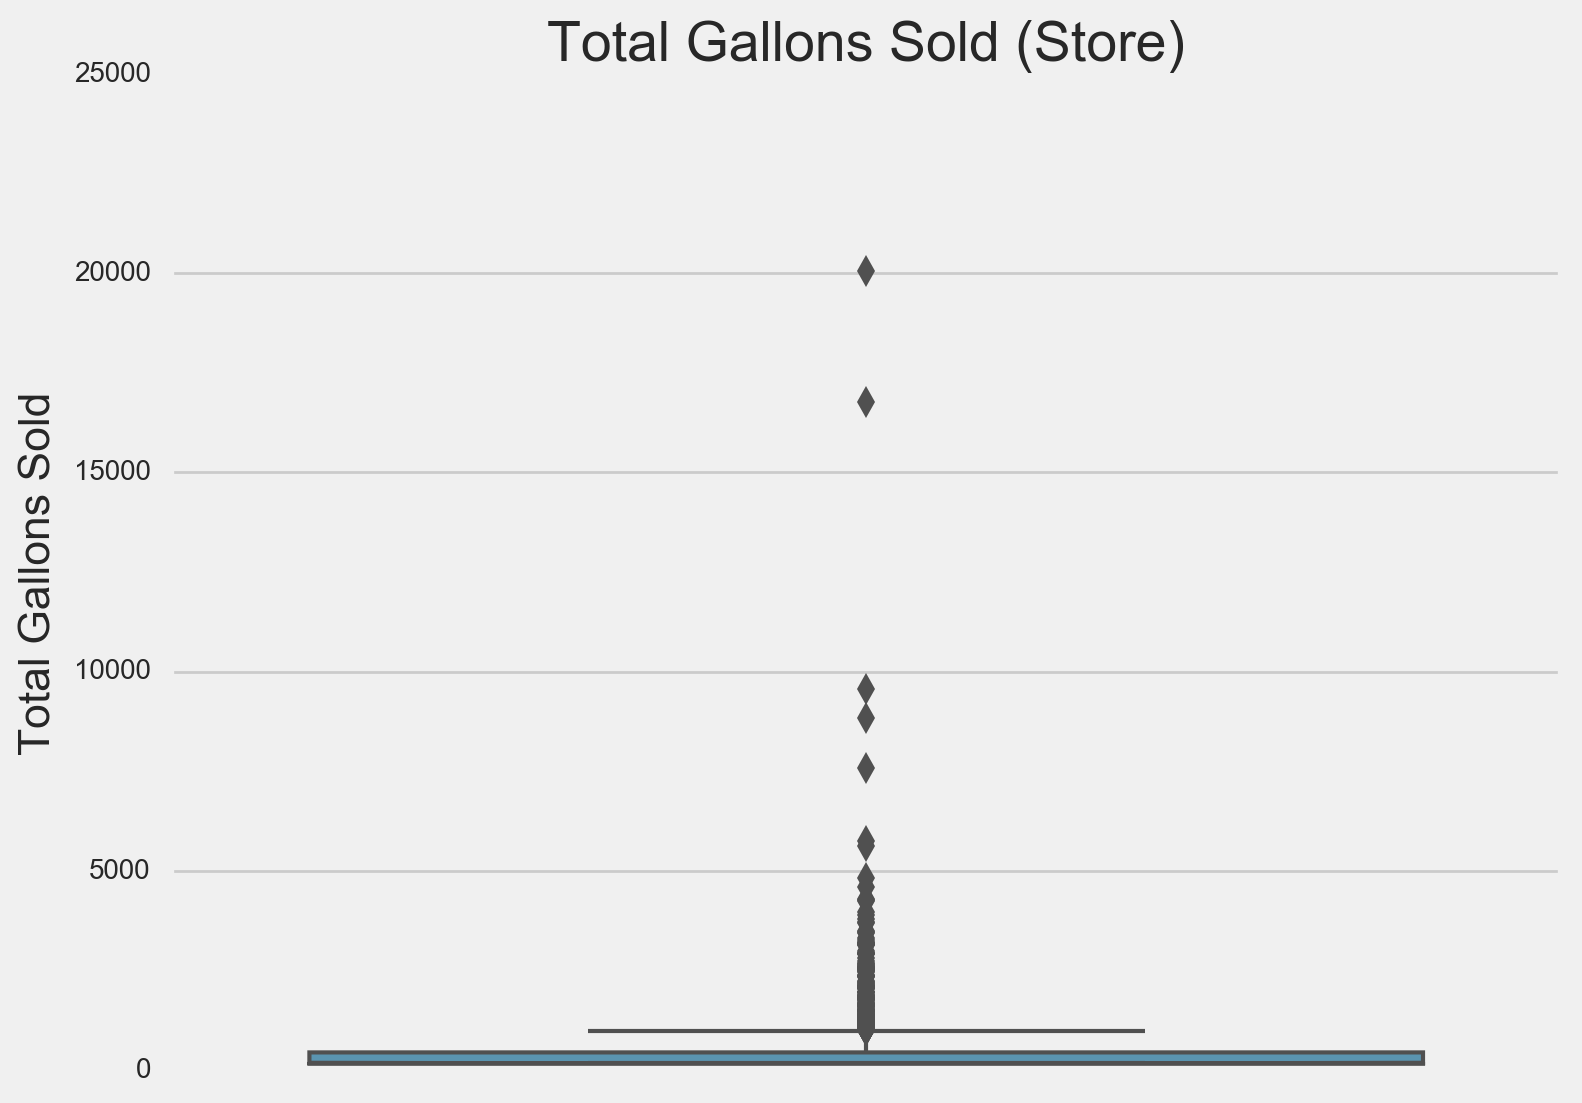

In [413]:
boxplots(total_gallons, "Total Gallons Sold (Store)","Total Gallons Sold")

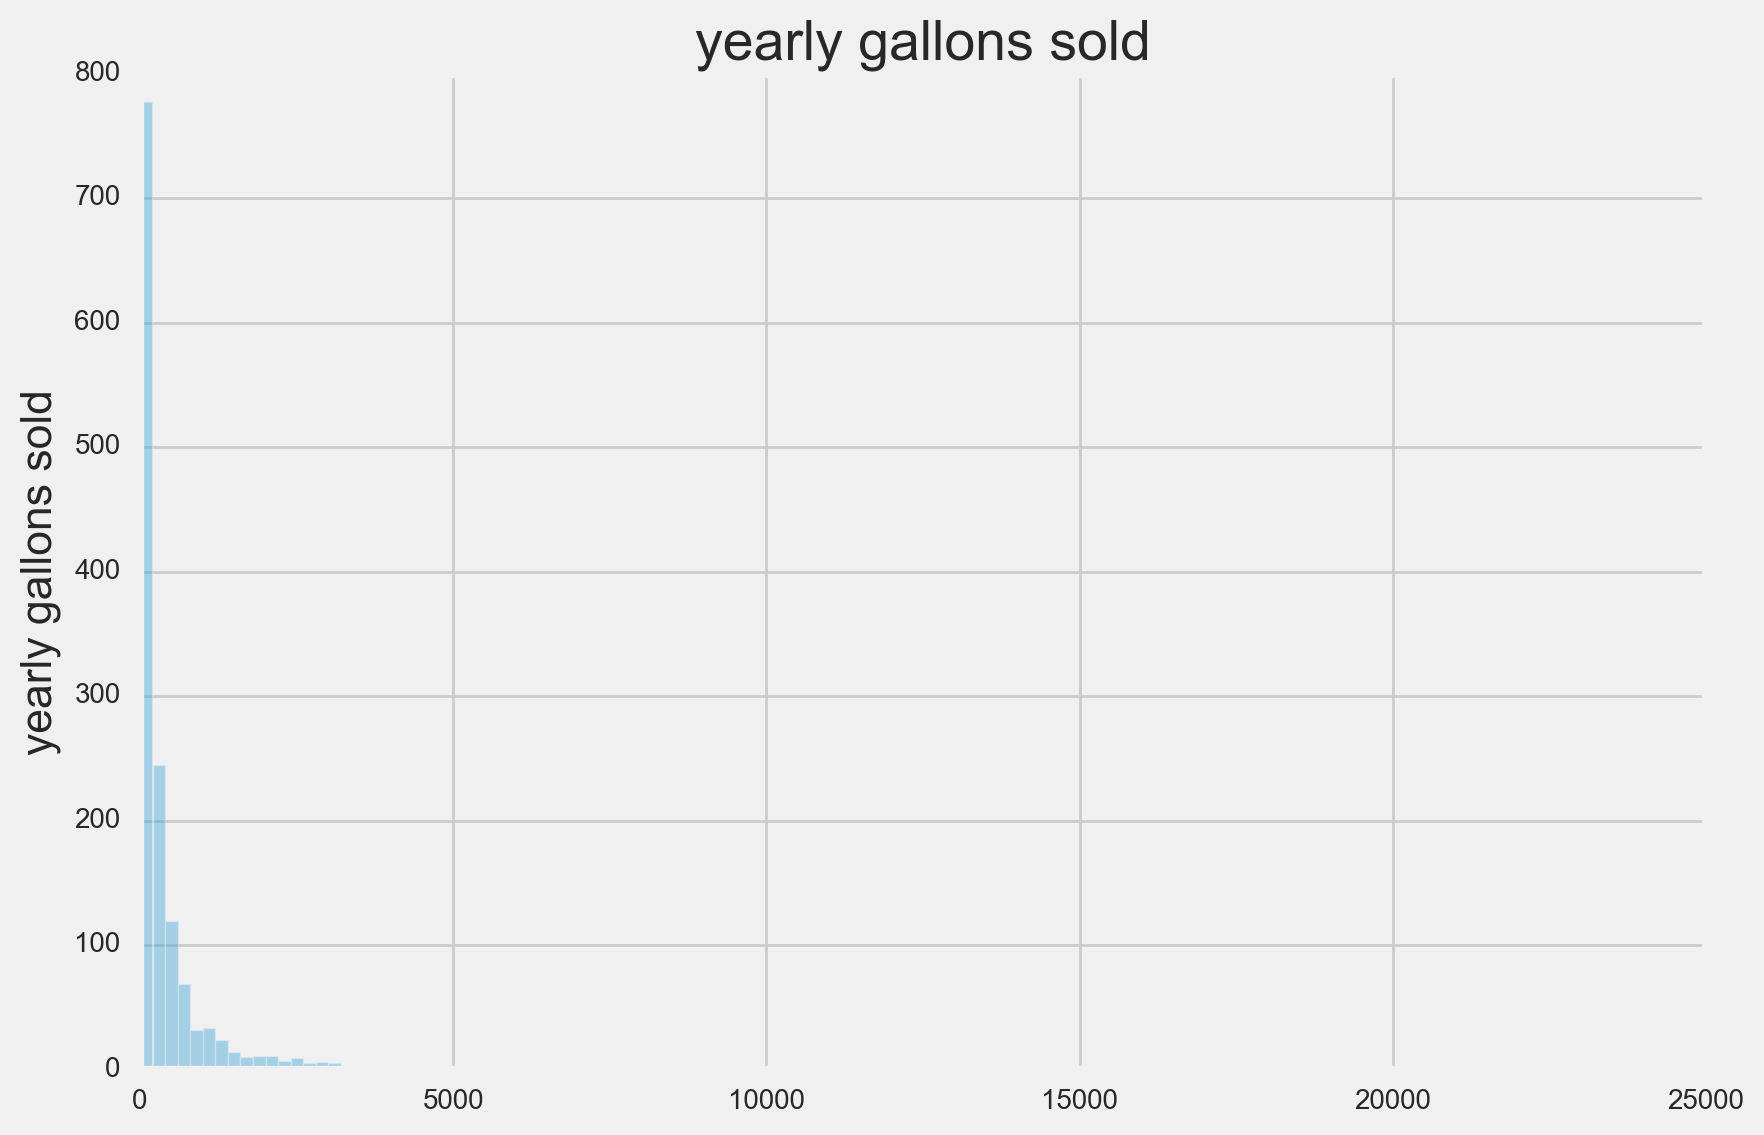

In [401]:
histogram(total_gallons, "yearly gallons sold", "yearly gallons sold")

In [403]:
gallons_norm=(total_gallons-total_gallons.mean())/total_gallons.std()



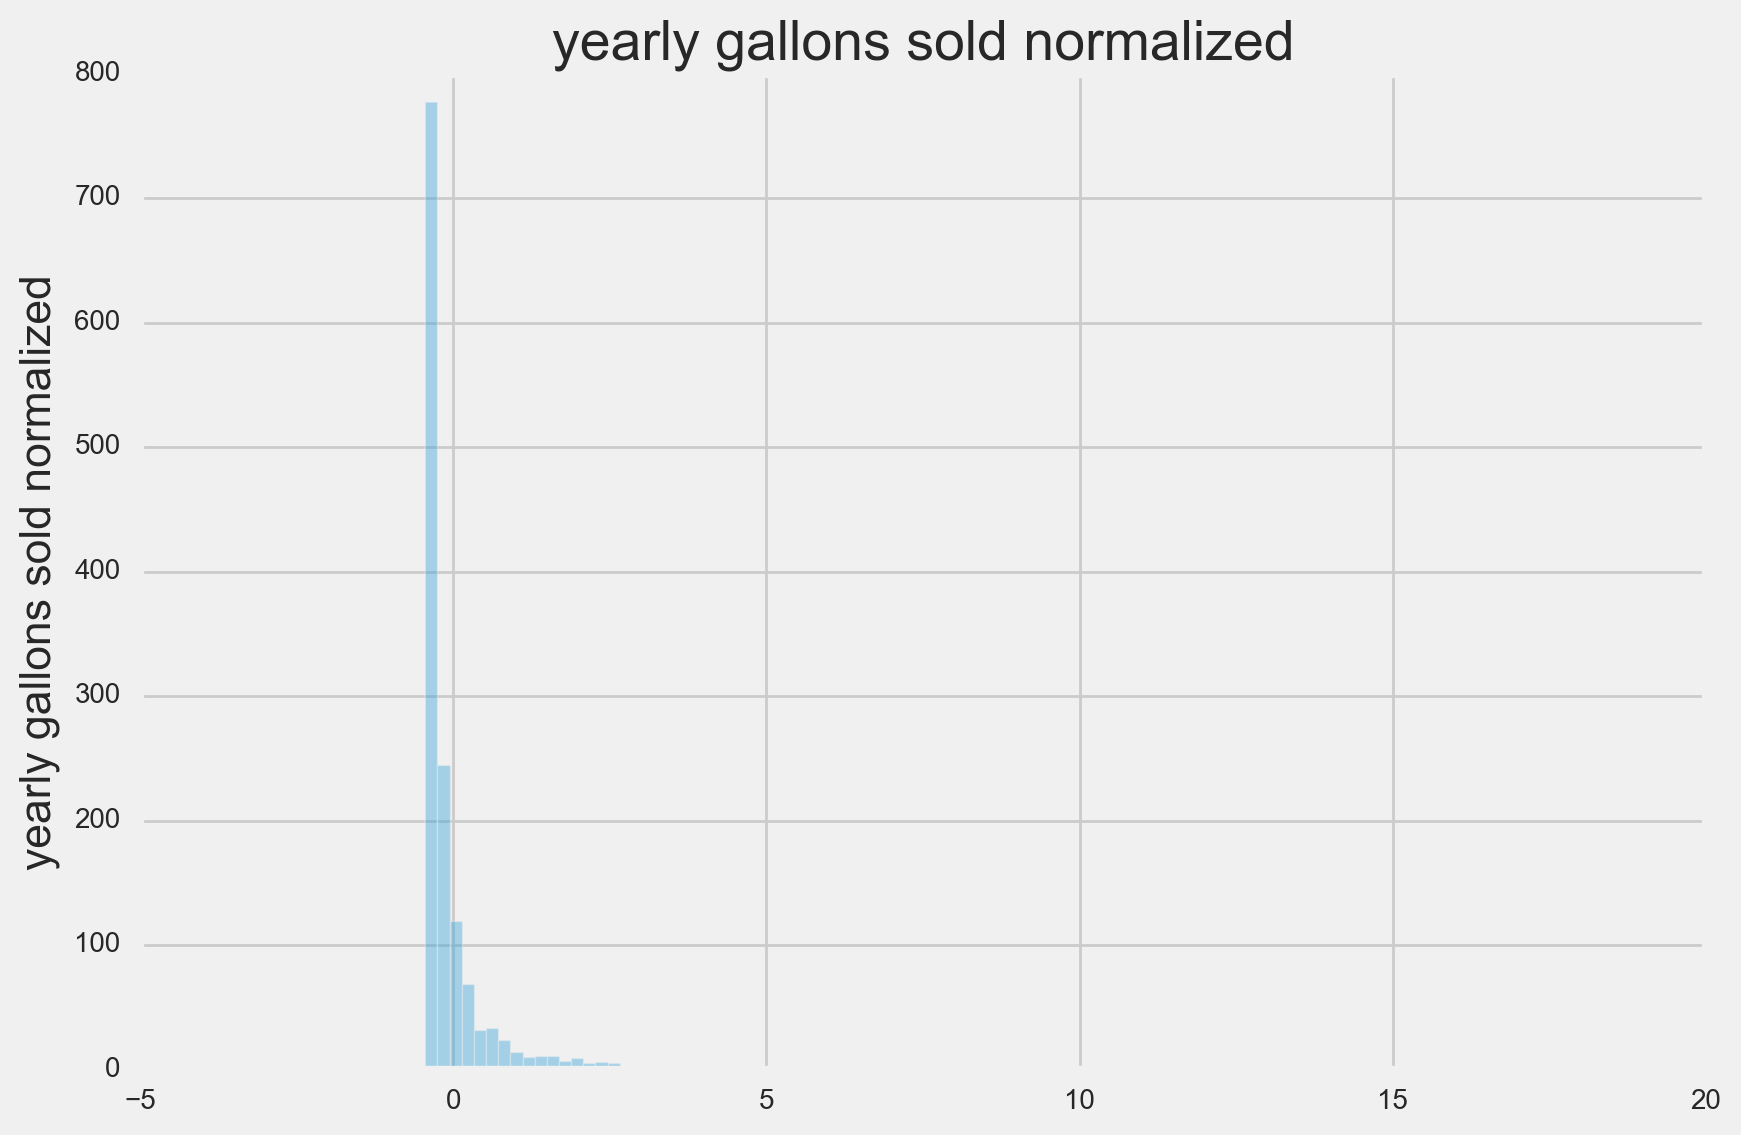

In [404]:
histogram(gallons_norm, "yearly gallons sold normalized", "yearly gallons sold normalized")

1400
1383


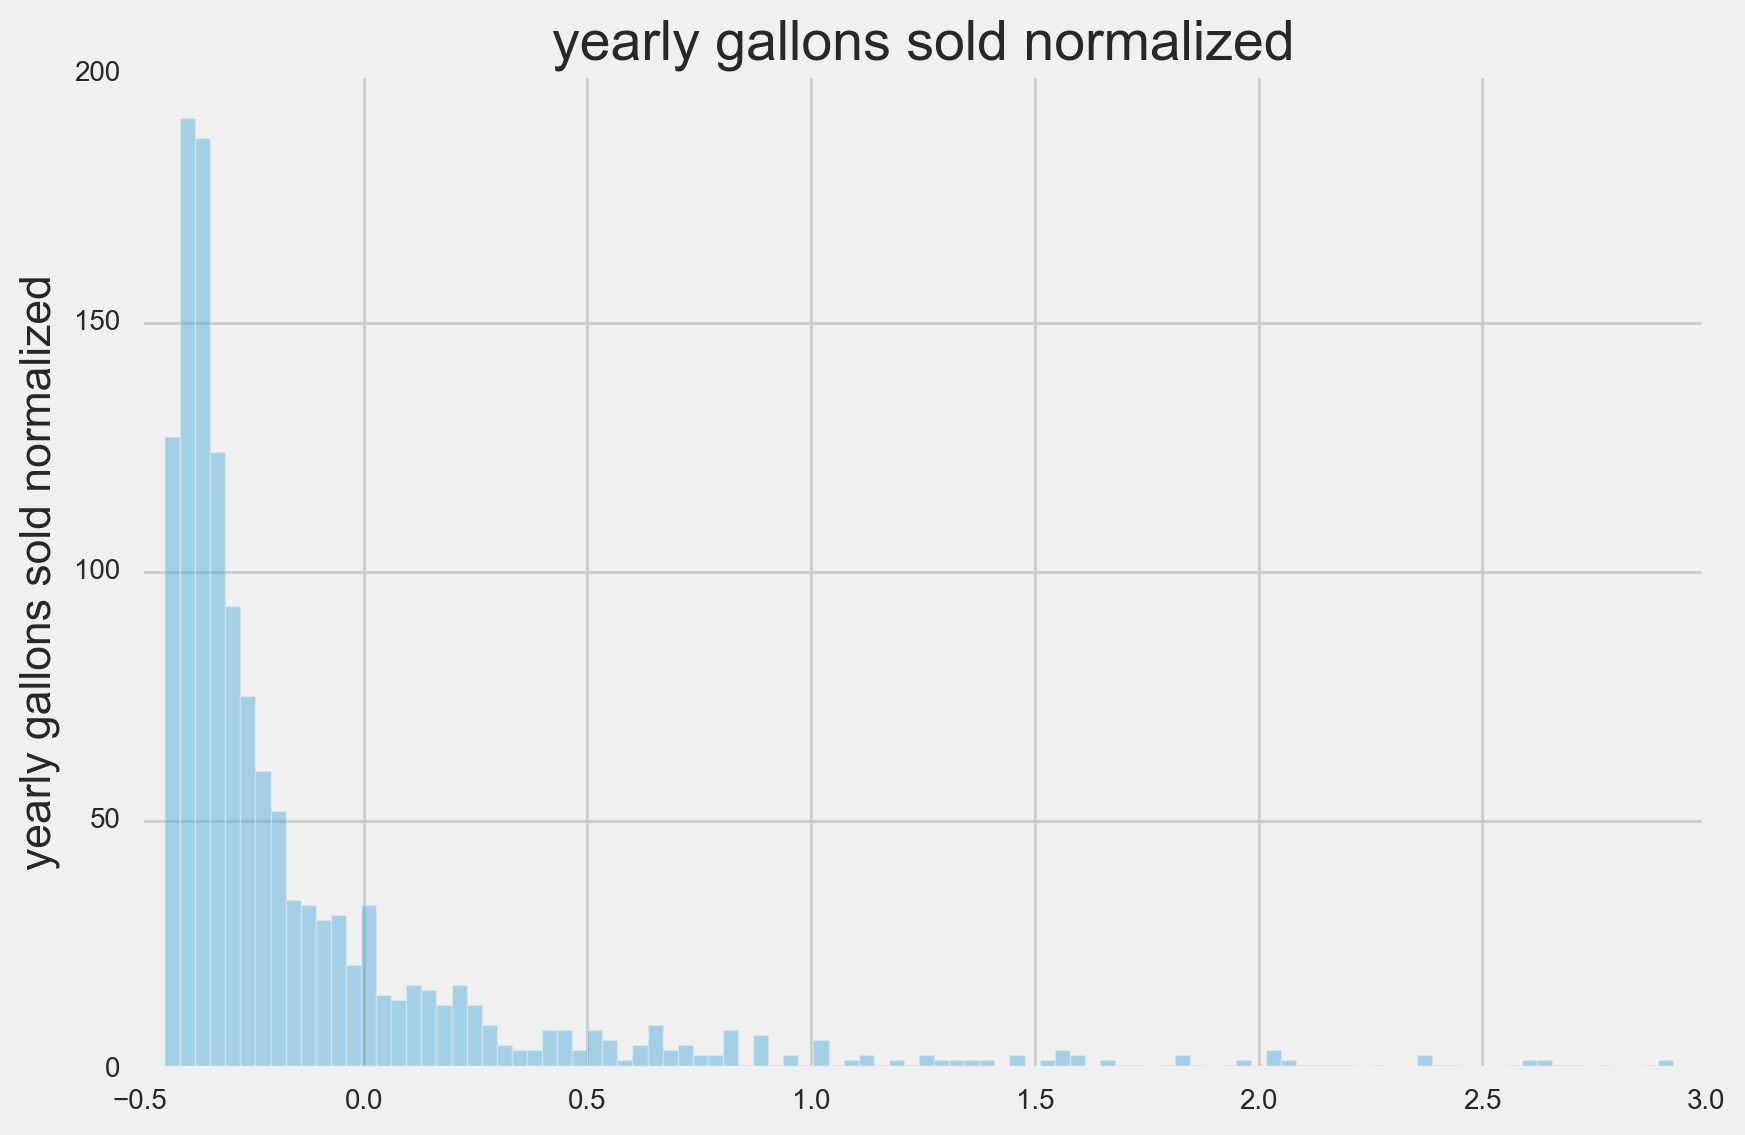

In [405]:
outlier_mask = (np.abs(gallons_norm) < 3)
print len(gallons_norm)
gallons_norm_no_outliers = gallons_norm[outlier_mask]
print len(gallons_norm_no_outliers)

histogram(gallons_norm_no_outliers, "yearly gallons sold normalized", "yearly gallons sold normalized")

In [406]:
yearly_gallons=store_size["gallons_sold"].apply(np.sum).reset_index()
yearly_gallons.describe()
iowa=pd.merge(iowa, yearly_gallons, on='Store Number', how='left')


In [407]:
iowa.rename(columns={
        "gallons_sold_y":"total_gallons_sold",
        "gallons_sold_x":"gallons_sold"}, inplace=True)

iowa["total_gallons_sold"].describe()

count    270955.000000
mean       1554.789100
std        2647.978371
min           0.200000
25%         291.710000
50%         781.250000
75%        1956.860000
max       20057.780000
Name: total_gallons_sold, dtype: float64

count    257815.000000
mean       1092.756864
std         993.902056
min           0.200000
25%         271.240000
50%         705.580000
75%        1727.920000
max        3965.870000
Name: total_gallons_sold, dtype: float64


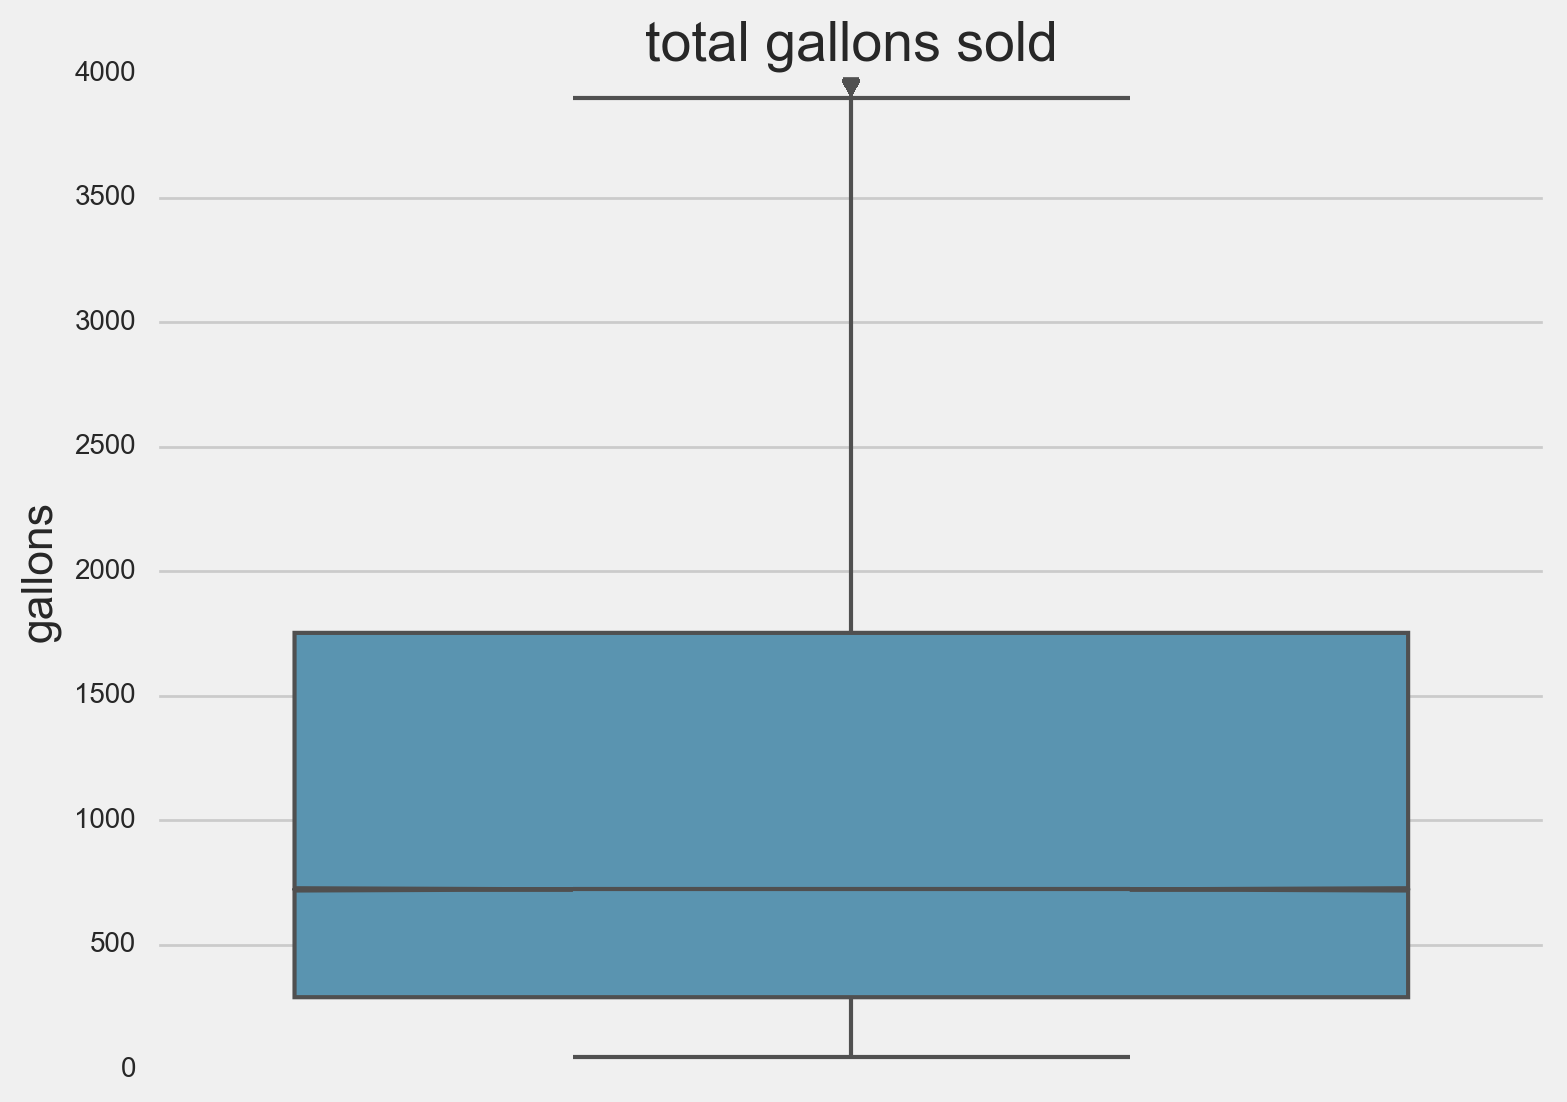

In [408]:
iowa=iowa[iowa["total_gallons_sold"]<4000 ]
print iowa["total_gallons_sold"].describe()
iowa=iowa[iowa["total_gallons_sold"]>50 ]


boxplots(iowa["total_gallons_sold"], "total gallons sold","gallons" )



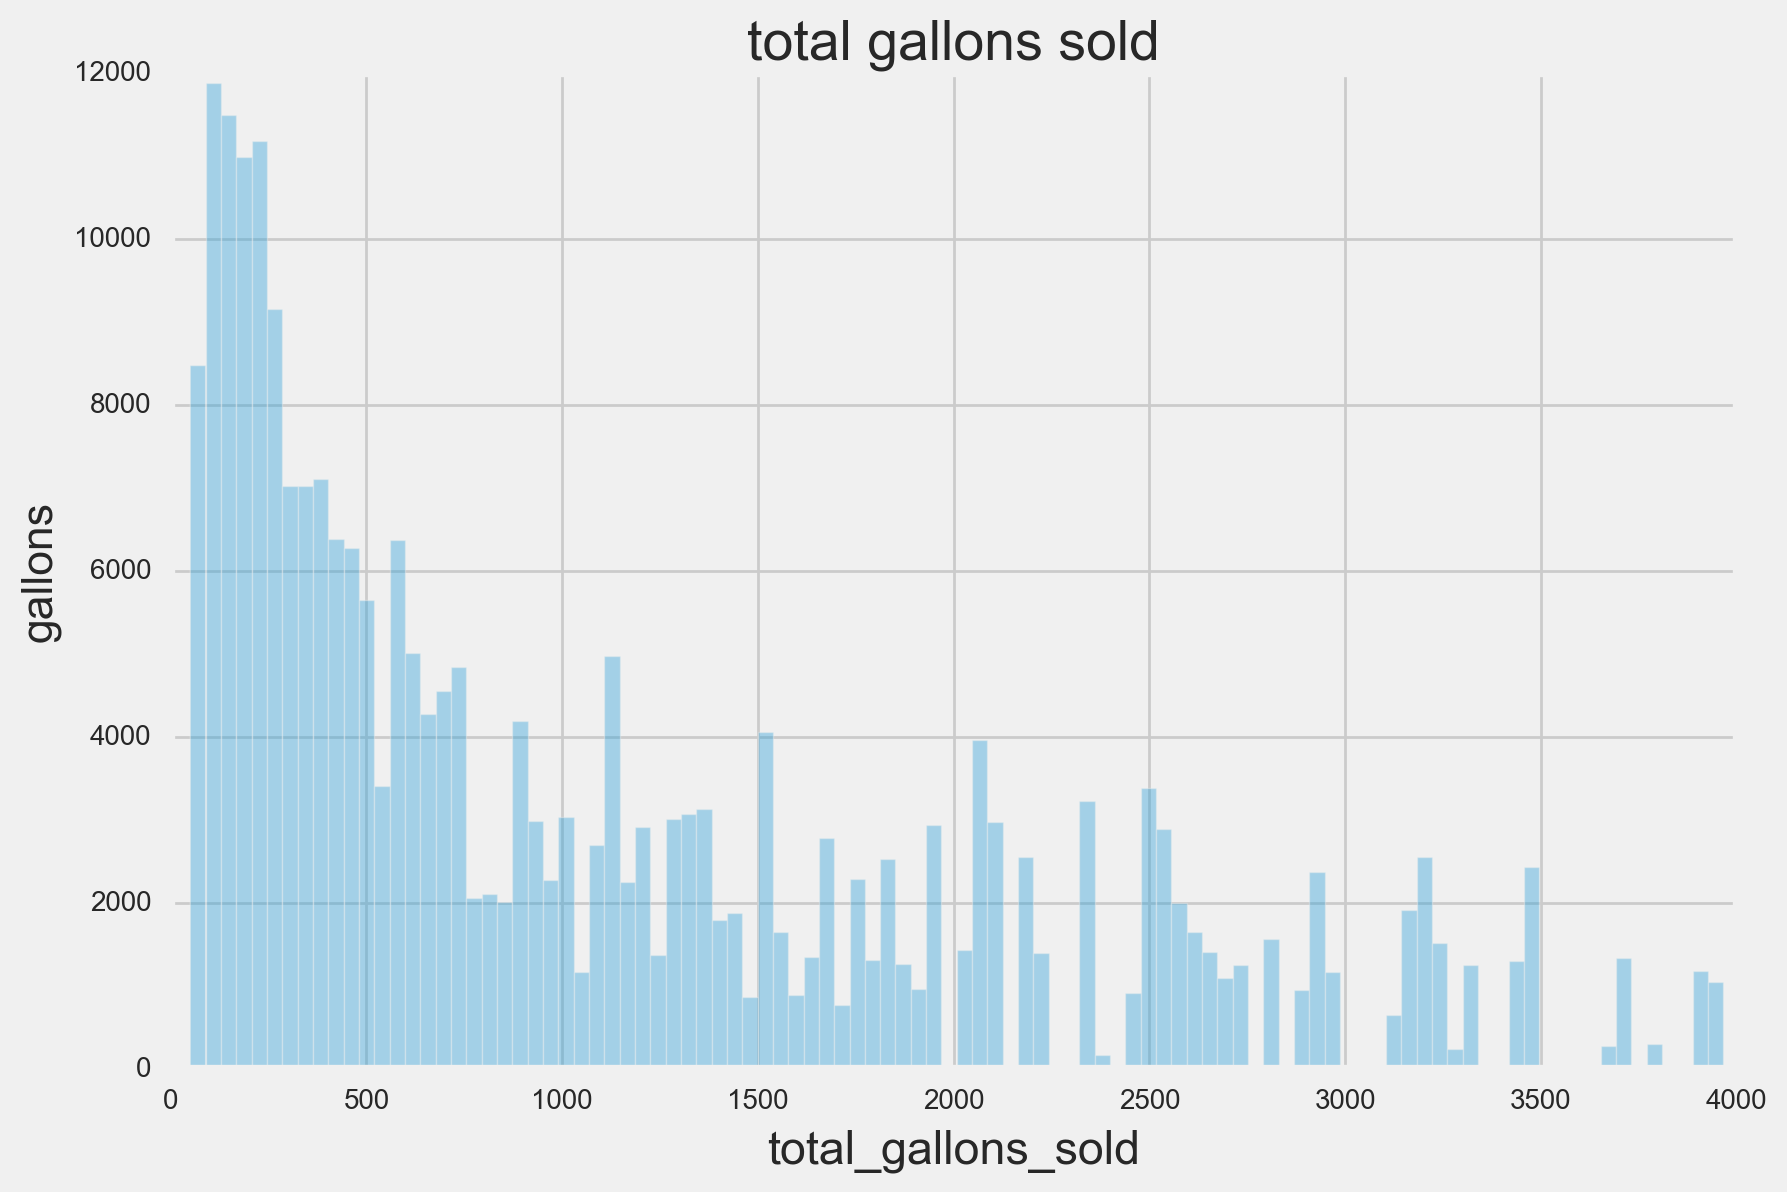

In [414]:
histogram(iowa["total_gallons_sold"], "total gallons sold","gallons" )




## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


I found the stores that do not have 12 months of data in the year of 2015, and remove them from the sample. Not having 12 months means that they either opened or closed in the year of 2015. I remove them because it is unclear how to replace the values with missing, and it should not be a problem besides losing statistical power from a lower sample size. 

In [415]:
#import datetime as dt
iowa['Month']=pd.DatetimeIndex(iowa["Date"]).month
iowa['Year']=pd.DatetimeIndex(iowa["Date"]).year

# Source from:
#http://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python

In [511]:
#Mask for sales that only took place in year 2015 to find which stores are "problem store"
iowa["year_2015"]= iowa["Year"].map(lambda value: 1 if value==2015 else 0)


iowa_2015=iowa[iowa["year_2015"]==1]


In [512]:

#Identify Problem Stores

print "Groupby store number and month."
iowa_months=iowa_2015.groupby(["Store Number", "Month"])["bottles_sold"].sum().reset_index()

print "_______________"

iowa_months2=iowa_months.groupby(["Store Number"])["Month"].sum().reset_index()

print "Sum up the months to see if months are missing"
print "_______________"
iowa_months2["problem_stores"]=iowa_months2["Month"].map(lambda value: 1 if value<78 else 0)

print "If the sum of the months are less than 78, then that means these stores opened or closed in 2015, and are 'problem stores'"
print "_______________"
iowa_months2.sort_values("problem_stores", ascending=True)
iowa_months2["problem_stores"].value_counts()

print "There are 542 'problem stores'"

Groupby store number and month.
_______________
Sum up the months to see if months are missing
_______________
If the sum of the months are less than 78, then that means these stores opened or closed in 2015, and are 'problem stores'
_______________
There are 542 'problem stores'


In [513]:
print "Merge the 'problem store' column with the main 2015 dataframe to identify which sales occured in problem stores/non-problem stores"

iowa_2015=pd.merge(iowa_2015, iowa_months2, on='Store Number', how='left')
iowa_2015.tail(10)

Merge the 'problem store' column with the main 2015 dataframe to identify which sales occured in problem stores/non-problem stores


,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,bottle_cost,bottle_price,bottles_sold,revenue,gallons_sold,Bottle Volume (gallons),total_gallons_sold,Month_x,Year,year_2015,Month_y,problem_stores
205569,10/21/2015,4438,85.0,Story,1011200.0,STRAIGHT BOURBON WHISKIES,65,6.83,10.25,1,10.25,0.13,0.132086,117.34,10,2015,1,78,0
205570,06/11/2015,2627,77.0,Polk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,55,0.89,1.34,48,64.32,1.27,0.026417,1772.14,6,2015,1,78,0
205571,11/24/2015,5162,77.0,Polk,1031080.0,VODKA 80 PROOF,301,9.65,14.48,4,57.92,0.79,0.198129,271.59,11,2015,1,63,1
205572,05/12/2015,4375,77.0,Polk,1062310.0,SPICED RUM,260,5.00,7.50,6,45.00,0.59,0.099064,122.33,5,2015,1,78,0
205573,04/08/2015,2545,52.0,Johnson,1062300.0,FLAVORED RUM,35,8.50,12.75,3,38.25,0.59,0.198129,953.50,4,2015,1,78,0
205574,07/21/2015,2529,57.0,Linn,1031100.0,100 PROOF VODKA,300,4.13,6.20,3,18.60,0.79,0.264172,1145.01,7,2015,1,78,0
205575,12/22/2015,4057,77.0,Polk,1022100.0,TEQUILA,410,20.30,30.45,4,121.80,0.32,0.079252,727.26,12,2015,1,78,0
205576,11/04/2015,5151,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,7.47,11.21,3,33.63,0.59,0.198129,532.90,11,2015,1,68,1
205577,11/20/2015,3562,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,26.05,39.08,6,234.48,2.77,0.462301,1631.78,11,2015,1,78,0
205578,01/27/2015,4446,77.0,Polk,1031080.0,VODKA 80 PROOF,260,2.75,4.13,8,33.04,0.42,0.052834,179.61,1,2015,1,78,0


In [487]:
print "Mask for only the non_problem stores"
iowa_2015=iowa_2015[iowa_2015["problem_stores"]==0]
iowa_2015

Mask for only the non_problem stores


,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,bottle_cost,bottle_price,bottles_sold,revenue,gallons_sold,Bottle Volume (gallons),total_gallons_sold,Month_x,Year,year_2015,Month_y,problem_stores
0,11/04/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,12,81.00,2.38,0.198129,230.40,11,2015,1,78,0
1,08/18/2015,3654,99.0,Wright,1031080.0,VODKA 80 PROOF,297,7.20,10.80,12,129.60,5.55,0.462301,271.81,8,2015,1,78,0
2,04/20/2015,2569,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,13.32,19.98,6,119.88,2.77,0.462301,1144.51,4,2015,1,78,0
3,08/05/2015,2596,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,29.97,0.59,0.198129,791.88,8,2015,1,78,0
4,06/25/2015,3456,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,15.75,23.63,2,47.26,0.92,0.462301,1500.75,6,2015,1,78,0
5,11/10/2015,4346,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,7.62,11.43,2,22.86,0.53,0.264172,240.47,11,2015,1,78,0
6,09/28/2015,2648,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,26.24,39.36,6,236.16,1.19,0.198129,2926.68,9,2015,1,78,0
7,10/28/2015,2600,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,6.00,9.25,6,55.50,2.77,0.462301,566.76,10,2015,1,78,0
8,01/22/2015,3858,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,8.92,13.38,1,13.38,0.46,0.462301,483.31,1,2015,1,78,0
9,06/10/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,4,27.00,0.79,0.198129,230.40,6,2015,1,78,0



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [ ]:
#Groupby store and year, sum of sales (revenue)
#Maybe create a mask that is a dataframe that only has store info for 2015. So if year==2015, then add into a new dataframe.

### 5.2 Calculate the profit each store is making in 2015.


In [525]:
# Total Revenue - Total Cost
#bottle_price*bottles_sold - bottle_cost*bottles_sold
def profit(df, cost, quant):
    
    df["total_cost"]=df[cost]*df[quant]
    df["profit"]=df["revenue"]-df["total_cost"]


profit(iowa_2015,"bottle_cost", "bottles_sold")
# iowa_2015["total_rev"]=iowa_2015["bottle_price"]*iowa_2015["bottles_sold"]
# iowa_2015["total_cost"]=iowa_2015["bottle_cost"]*iowa_2015["bottles_sold"]
# iowa_2015["profit"]=iowa_2015["total_rev"]-iowa_2015["total_cost"]





In [526]:
#What stores have the highest total profits in 2015?
print "What stores have the highest store profits from liquor in 2015?"
print "Store 2633, 4829, 3385, 2512, and 3420 earned the most profit in liquor sales in 2015"


store_profits_2015=iowa_2015["profit"].groupby(iowa_2015["Store Number"]).sum().reset_index()
store_profits_2015.sort_values("profit",inplace=True, ascending=False)
store_profits_2015.reset_index().head(10)


What stores have the highest store profits from liquor in 2015?
Store 2633, 4829, 3385, 2512, and 3420 earned the most profit in liquor sales in 2015


,index,Store Number,profit
0,91,2593,64197.45
1,122,2629,61636.70
2,118,2625,60794.18
3,204,3524,60528.54
4,145,2663,58512.28
5,311,3820,57650.18
6,473,4167,55756.18
7,132,2648,52950.63
8,68,2561,52844.61
9,110,2616,51472.43


There are some stores that are making far more profits than other stores.


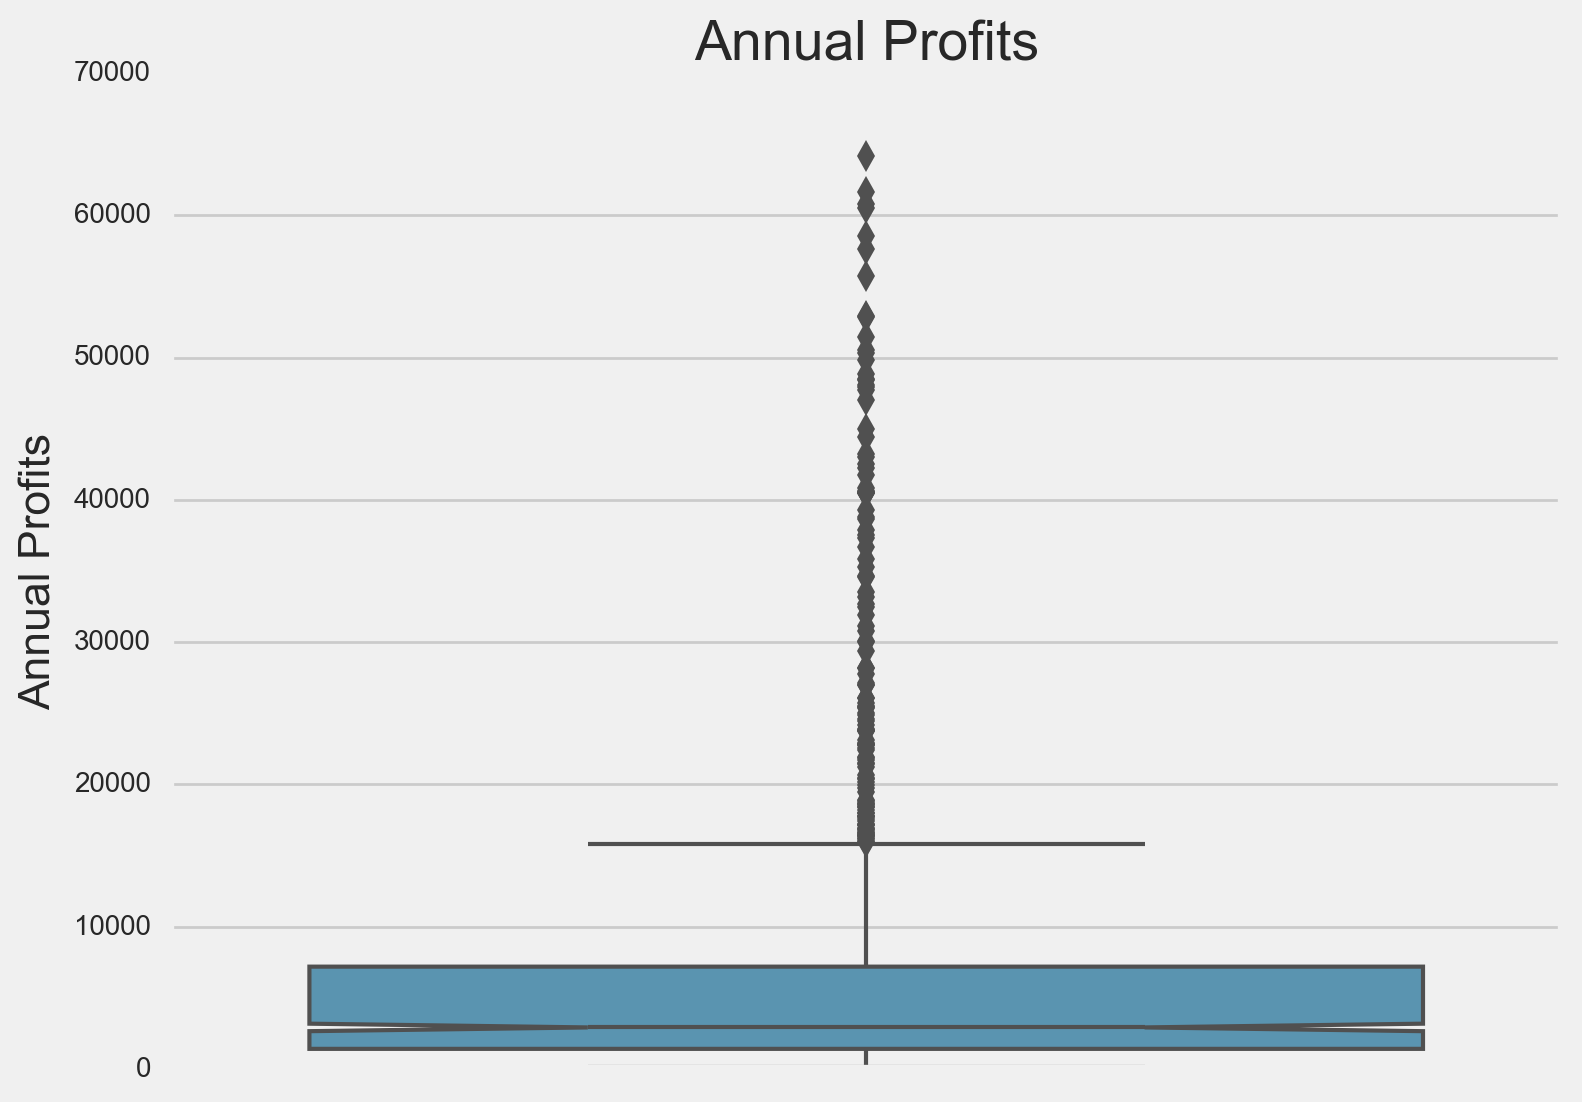

In [527]:
print "There are some stores that are making far more profits than other stores."
profits=store_profits_2015["profit"].values
profits
boxplots(profits,"Annual Profits", "Annual Profits" )

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [528]:
#Split dataframe so it only shows the total profits, and total gallons sold in each county
county_profits_2015=iowa_2015["profit"].groupby(iowa["County"]).sum()
county_profit_2015=county_profits_2015.reset_index()

county_volume_2015=iowa_2015["gallons_sold"].groupby(iowa["County"]).sum()
county_vol_2015=county_volume_2015.reset_index()


# county_profit_per_volume=county_profits_2015%county_volume_2015
# county_profit_per_volume
# county_profit_per_volume.sort_values(ascending=False,inplace=True)
# county_profit_per_volume.reset_index().head(10)

iowa_counties=pd.merge(county_profit_2015, county_vol_2015, on='County', how='left')




In [529]:
iowa_counties["profit_per_gallon"]=iowa_counties["profit"]/iowa_counties["gallons_sold"]
iowa_counties.sort_values("profit_per_gallon", ascending=False).head()

,County,profit,gallons_sold,profit_per_gallon
35,Fremont,1551.41,73.46,21.119112
79,Ringgold,5217.05,249.81,20.884072
71,Osceola,11919.98,598.33,19.922083
68,Montgomery,21867.47,1100.12,19.877350
44,Howard,18194.63,919.35,19.790754


In [530]:
print "Ringgold, Fremont, Montgomery, Osceola, and Pocahantas counties have made the most profits per gallon sold"

Ringgold, Fremont, Montgomery, Osceola, and Pocahantas counties have made the most profits per gallon sold


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [531]:
iowa_profit_to_size=iowa_2015[["profit", "gallons_sold"]].groupby(iowa_2015["Store Number"]).sum().reset_index()
print "Total profits and total gallons sold in 2015"
iowa_profit_to_size[["gallons_sold", "profit"]].describe()
iowa_profit_to_size.head()

Total profits and total gallons sold in 2015


,Store Number,profit,gallons_sold
0,2106,48838.08,2571.33
1,2113,3109.04,174.29
2,2130,37325.20,1820.65
3,2152,2587.53,167.28
4,2178,8165.70,506.50


In [532]:
#Profit to Store Size Ratio
iowa_profit_to_size["profit_to_size"]=iowa_profit_to_size["profit"]/iowa_profit_to_size["gallons_sold"]
iowa_profit_to_size.head()

,Store Number,profit,gallons_sold,profit_to_size
0,2106,48838.08,2571.33,18.993315
1,2113,3109.04,174.29,17.838315
2,2130,37325.20,1820.65,20.501030
3,2152,2587.53,167.28,15.468257
4,2178,8165.70,506.50,16.121816


In [533]:
iowa_profit_to_size["profit_to_size"].describe()

count    1185.000000
mean       17.627957
std         3.761363
min        10.025417
25%        15.279952
50%        17.104198
75%        19.137747
max        55.699106
Name: profit_to_size, dtype: float64

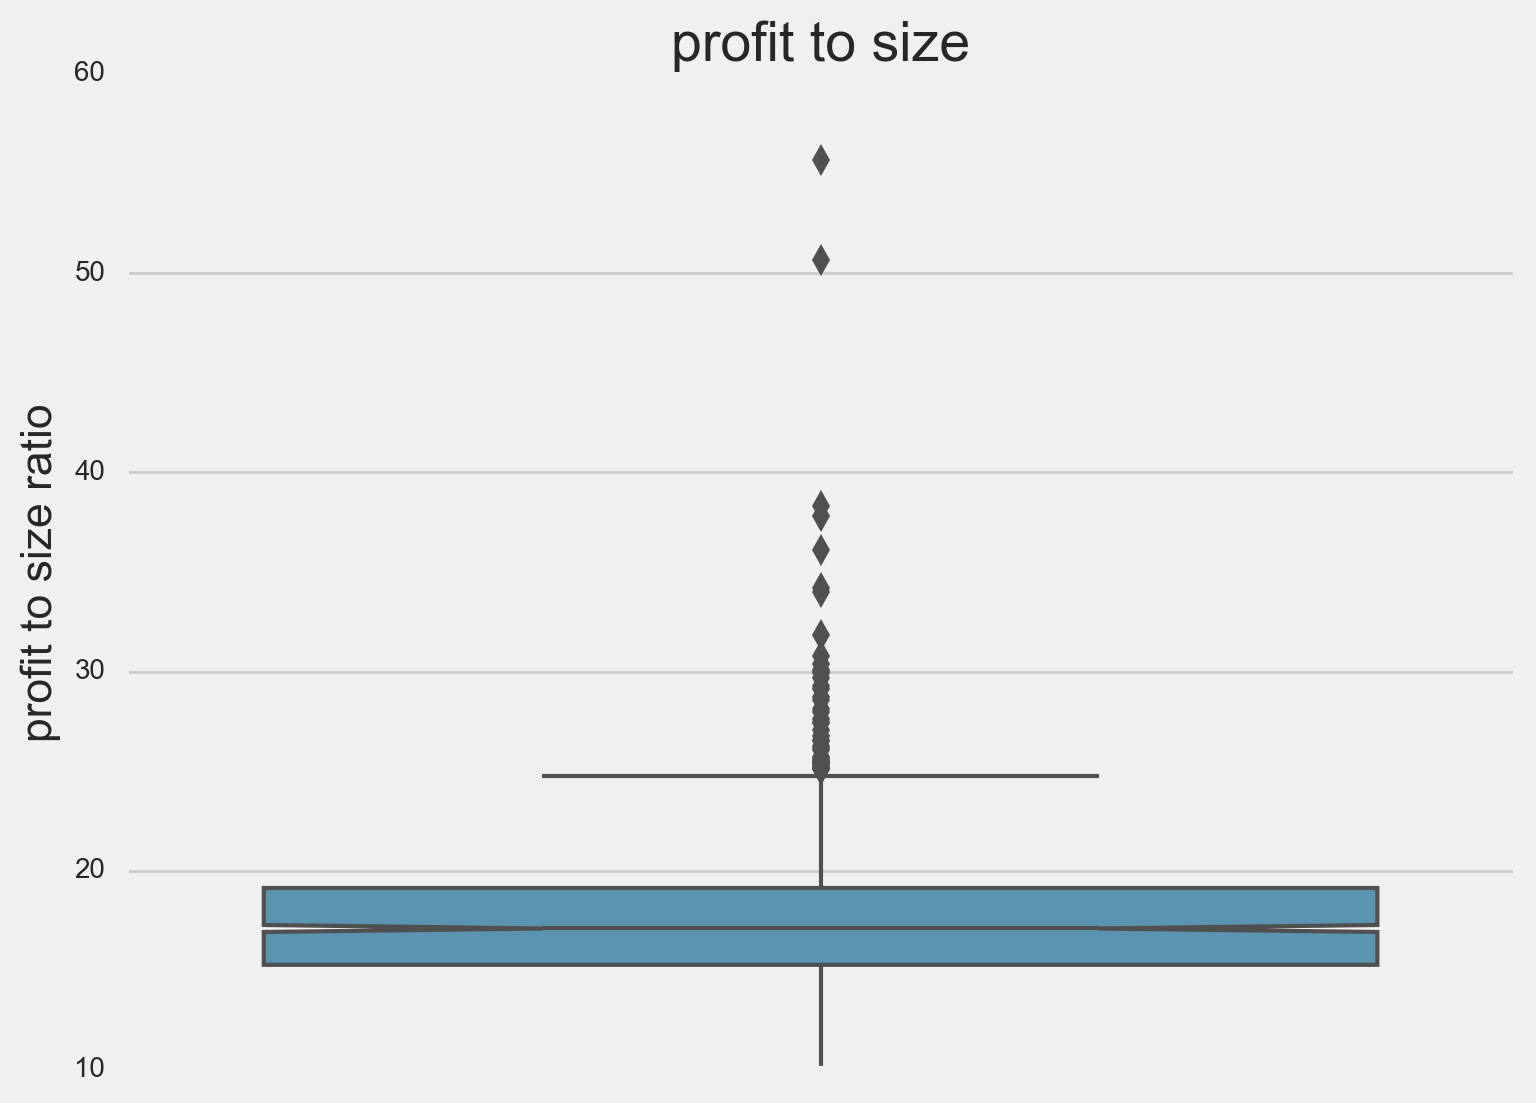

In [534]:
boxplots(iowa_profit_to_size["profit_to_size"],"profit to size", "profit to size ratio" )

In [535]:
iowa_profit_to_size.corr()

,Store Number,profit,gallons_sold,profit_to_size
Store Number,1.000000,-0.521525,-0.550740,0.194601
profit,-0.521525,1.000000,0.985572,0.133408
gallons_sold,-0.550740,0.985572,1.000000,0.031584
profit_to_size,0.194601,0.133408,0.031584,1.000000


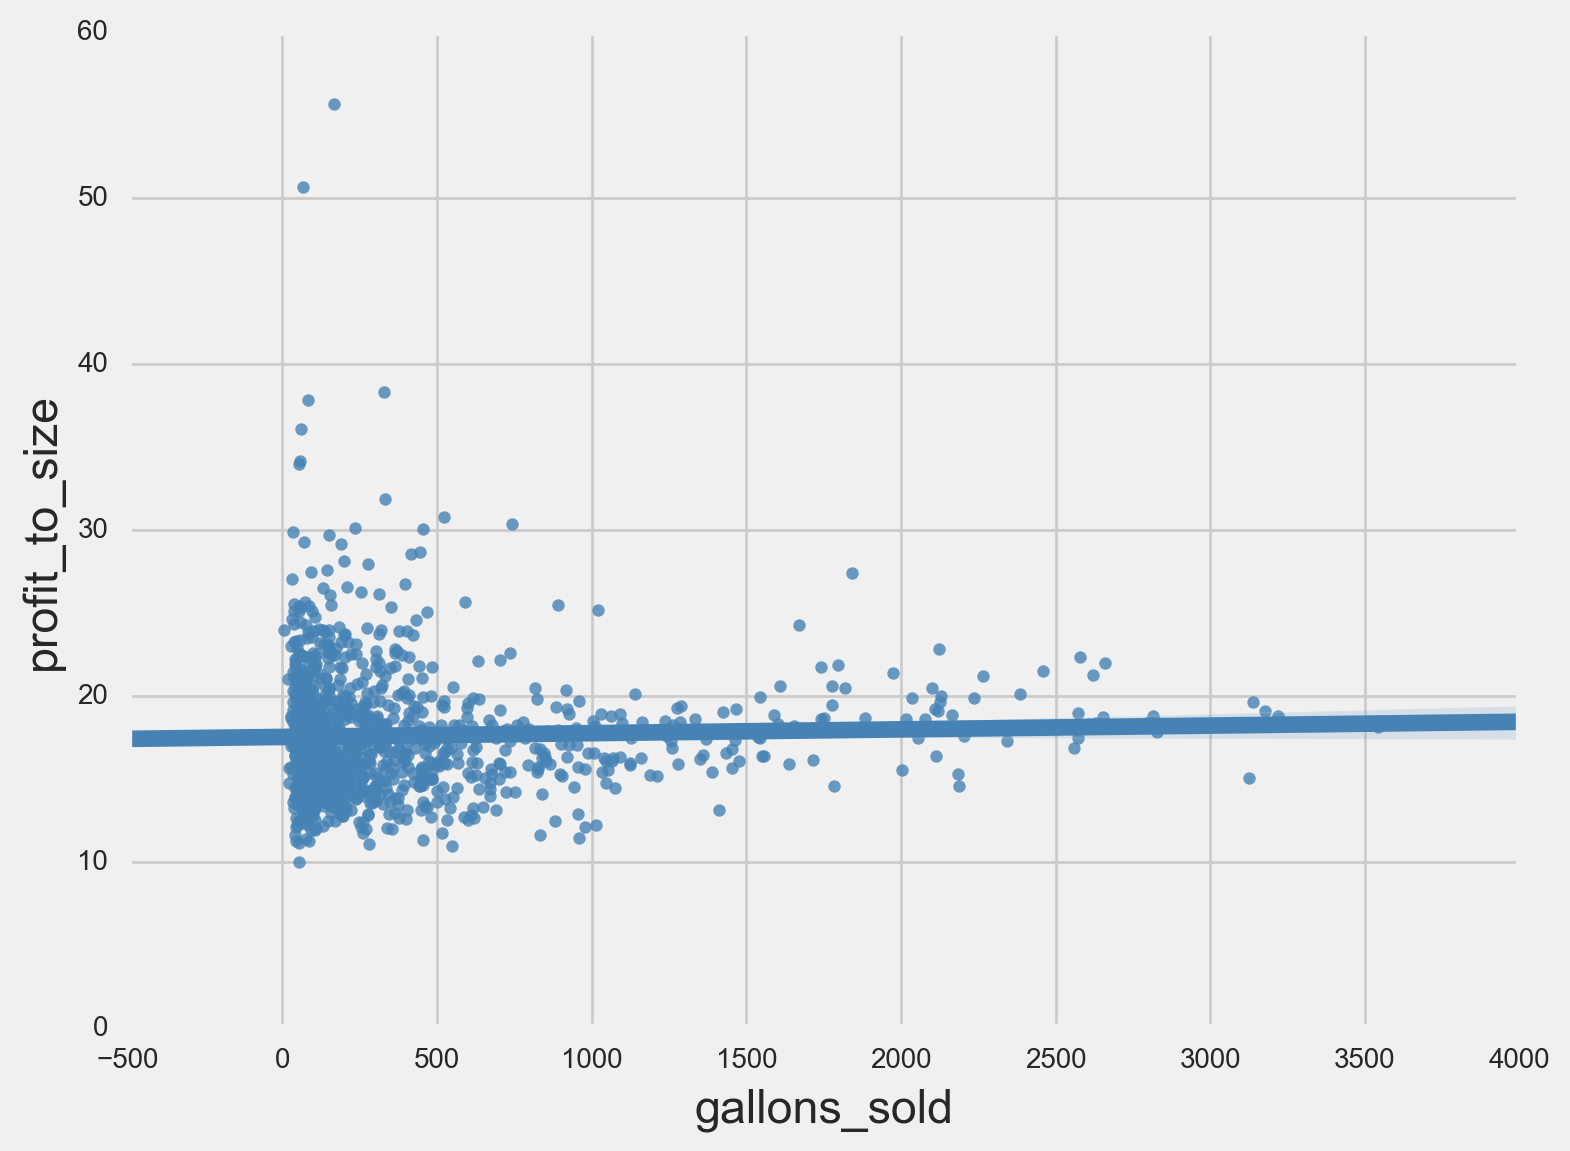

In [536]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(iowa_profit_to_size["gallons_sold"],iowa_profit_to_size["profit_to_size"], fit_reg=True, color='steelblue', ax=ax, x_jitter=.1)
# ax = sns.regplot(iowa_profit_to_size["profit"],iowa_profit_to_size["gallons_sold"], fit_reg=False, color='steelblue', ax=ax)

In [537]:
print "Profit seems to be increasing proportionally with store size."

Profit seems to be increasing proportionally with store size.


### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [538]:
def broader_category(df):
    df["new_category"]=df["Category"].apply(lambda x: (x/10000))
    df["new_category"]=np.round(df["new_category"])
    df[["Category", "new_category", "Category Name"]]
    df["new_category_name"]=df["new_category"].apply(lambda x: "Whiskey" if x ==101.0 else "Brandies" if x==105.0 else"Vodkas" if x==103.0 else "Gins" if x==104.0 else "Misc" if x==108.0 else "Tequila" if x==102.0 else "Cocktails" if x==107.0 else "Rums" if x==106.0 else x)
    df=df[df["new_category_name"]!=109.0]
    df=df[df["new_category_name"]!=110.0]
    df=df[df["new_category_name"]!=150]
    df=df[df["new_category_name"]!=170]

broader_category(iowa_2015)
iowa_2015

,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,bottle_cost,bottle_price,bottles_sold,...,Month_x,Year,year_2015,Month_y,problem_stores,mom_pop,total_cost,profit,new_category,new_category_name
0,11/04/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,12,...,11,2015,1,78,0,0,54.00,27.00,105.0,Brandies
1,08/18/2015,3654,99.0,Wright,1031080.0,VODKA 80 PROOF,297,7.20,10.80,12,...,8,2015,1,78,0,0,86.40,43.20,103.0,Vodkas
2,04/20/2015,2569,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,13.32,19.98,6,...,4,2015,1,78,0,0,79.92,39.96,104.0,Gins
3,08/05/2015,2596,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,...,8,2015,1,78,0,0,19.98,9.99,105.0,Brandies
4,06/25/2015,3456,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,15.75,23.63,2,...,6,2015,1,78,0,0,31.50,15.76,101.0,Whiskey
5,11/10/2015,4346,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,7.62,11.43,2,...,11,2015,1,78,0,0,15.24,7.62,108.0,Misc
6,09/28/2015,2648,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,26.24,39.36,6,...,9,2015,1,78,0,1,157.44,78.72,101.0,Whiskey
7,10/28/2015,2600,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,6.00,9.25,6,...,10,2015,1,78,0,0,36.00,19.50,107.0,Cocktails
8,01/22/2015,3858,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,8.92,13.38,1,...,1,2015,1,78,0,0,8.92,4.46,101.0,Whiskey
9,06/10/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,4,...,6,2015,1,78,0,0,18.00,9.00,105.0,Brandies


### 5.6 Do relationships exist between the broader liquor type and profit?

In [539]:
iowa_categories=iowa_2015.groupby("new_category_name")[["profit", "gallons_sold"]].sum().reset_index()
iowa_categories["profit/gallon"]=iowa_categories["profit"]/ iowa_categories["gallons_sold"]
iowa_categories.sort_values("profit/gallon", ascending=False)

,new_category_name,profit,gallons_sold,profit/gallon
1,150,95.18,0.40,237.950000
2,170,87273.46,2840.29,30.726954
8,Tequila,367068.05,13204.96,27.797740
3,Brandies,364876.88,14912.69,24.467543
0,110,20245.74,901.23,22.464565
6,Misc,1192126.90,57340.12,20.790450
10,Whiskey,2498676.87,125297.45,19.941961
7,Rums,1066945.13,60951.72,17.504758
5,Gins,203777.80,12406.09,16.425626
9,Vodkas,1924101.96,137812.54,13.961734


In [503]:
print "Tequila and Brandies have the highest profit per gallon sold"


Tequila and Brandies have the highest profit per gallon sold


In [504]:
print "Brand 80, 268, 503, 187, and 410 are the most profitable per gallon"

Brand 80, 268, 503, 187, and 410 are the most profitable per gallon



### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [540]:
iowa_brands=iowa_2015.groupby("Vendor Number")[["profit", "gallons_sold"]].sum().reset_index()
iowa_brands["profit/gallon"]=iowa_brands["profit"]/ iowa_brands["gallons_sold"]
iowa_brands.sort_values("profit/gallon", ascending=False).head()

,Vendor Number,profit,gallons_sold,profit/gallon
4,80,95.18,0.40,237.950000
43,268,105.00,1.19,88.235294
96,503,278.46,3.57,78.000000
23,187,81.00,1.19,68.067227
79,410,77828.54,1157.67,67.228606


In [506]:
print "Brand 80, 268, 503, 187, and 410 are the most profitable per gallon"

Brand 80, 268, 503, 187, and 410 are the most profitable per gallon


In [510]:
iowa_2015

,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,bottle_cost,bottle_price,bottles_sold,...,Month_x,Year,year_2015,Month_y,problem_stores,total_cost,profit,new_category,new_category_name,gallons_sold_y
0,11/04/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,12,...,11,2015,1,78,0,54.00,27.00,105.0,Brandies,NaN
1,08/18/2015,3654,99.0,Wright,1031080.0,VODKA 80 PROOF,297,7.20,10.80,12,...,8,2015,1,78,0,86.40,43.20,103.0,Vodkas,NaN
2,04/20/2015,2569,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,13.32,19.98,6,...,4,2015,1,78,0,79.92,39.96,104.0,Gins,NaN
3,08/05/2015,2596,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,...,8,2015,1,78,0,19.98,9.99,105.0,Brandies,NaN
4,06/25/2015,3456,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,15.75,23.63,2,...,6,2015,1,78,0,31.50,15.76,101.0,Whiskey,NaN
5,11/10/2015,4346,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,7.62,11.43,2,...,11,2015,1,78,0,15.24,7.62,108.0,Misc,NaN
6,09/28/2015,2648,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,26.24,39.36,6,...,9,2015,1,78,0,157.44,78.72,101.0,Whiskey,NaN
7,10/28/2015,2600,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,6.00,9.25,6,...,10,2015,1,78,0,36.00,19.50,107.0,Cocktails,NaN
8,01/22/2015,3858,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,8.92,13.38,1,...,1,2015,1,78,0,8.92,4.46,101.0,Whiskey,NaN
9,06/10/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,4,...,6,2015,1,78,0,18.00,9.00,105.0,Brandies,NaN


In [541]:
store_size=iowa_2015.groupby("Store Number")
store_size
total_gallons=store_size["total_gallons_sold"].apply(np.mean).reset_index()




In [542]:
iowa_2015["total_gallons_sold"].describe()

count    205579.000000
mean       1110.931345
std         993.663200
min          50.010000
25%         293.310000
50%         722.490000
75%        1751.500000
max        3965.870000
Name: total_gallons_sold, dtype: float64

In [543]:
iowa_2015["mom_pop"]=iowa_2015["total_gallons_sold"].map(lambda value: 1 if value>1752 else 0)
iowa_2015

,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,bottle_cost,bottle_price,bottles_sold,...,Month_x,Year,year_2015,Month_y,problem_stores,mom_pop,total_cost,profit,new_category,new_category_name
0,11/04/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,12,...,11,2015,1,78,0,0,54.00,27.00,105.0,Brandies
1,08/18/2015,3654,99.0,Wright,1031080.0,VODKA 80 PROOF,297,7.20,10.80,12,...,8,2015,1,78,0,0,86.40,43.20,103.0,Vodkas
2,04/20/2015,2569,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,13.32,19.98,6,...,4,2015,1,78,0,0,79.92,39.96,104.0,Gins
3,08/05/2015,2596,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,...,8,2015,1,78,0,0,19.98,9.99,105.0,Brandies
4,06/25/2015,3456,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,15.75,23.63,2,...,6,2015,1,78,0,0,31.50,15.76,101.0,Whiskey
5,11/10/2015,4346,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,7.62,11.43,2,...,11,2015,1,78,0,0,15.24,7.62,108.0,Misc
6,09/28/2015,2648,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,26.24,39.36,6,...,9,2015,1,78,0,1,157.44,78.72,101.0,Whiskey
7,10/28/2015,2600,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,6.00,9.25,6,...,10,2015,1,78,0,0,36.00,19.50,107.0,Cocktails
8,01/22/2015,3858,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,8.92,13.38,1,...,1,2015,1,78,0,0,8.92,4.46,101.0,Whiskey
9,06/10/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,4,...,6,2015,1,78,0,0,18.00,9.00,105.0,Brandies


In [551]:
# # iowa_2015.groupby(iowa["Store Number"])["profit"]
# mom_pop_comparison=iowa_2015.groupby(["new_category_name","mom_pop_y"])["Bottle Volume (liters)"].mean().reset_index()
# mom_pop_comparison
# # mom_pop_comparison=mom_pop_comparison[mom_pop_comparison.new_category_name!=109.0]
# sns.barplot(x="new_category_name", y="Bottle Volume (liters)", hue="mom_pop_y", data=mom_pop_comparison)
# # #sns.barplot(x="mom_pop_y", y="gallons_sold", data=mom_pop_comparison)
def mom_pop_comparisons_sum(x):
    mom_pop_comparison=iowa_2015.groupby(["new_category_name","mom_pop"])[x].sum().reset_index()
    sns.barplot(x="new_category_name", y=x, hue="mom_pop", data=mom_pop_comparison)








Mom and Pop Stores have lower total profits of each category than non-mom and pop stores


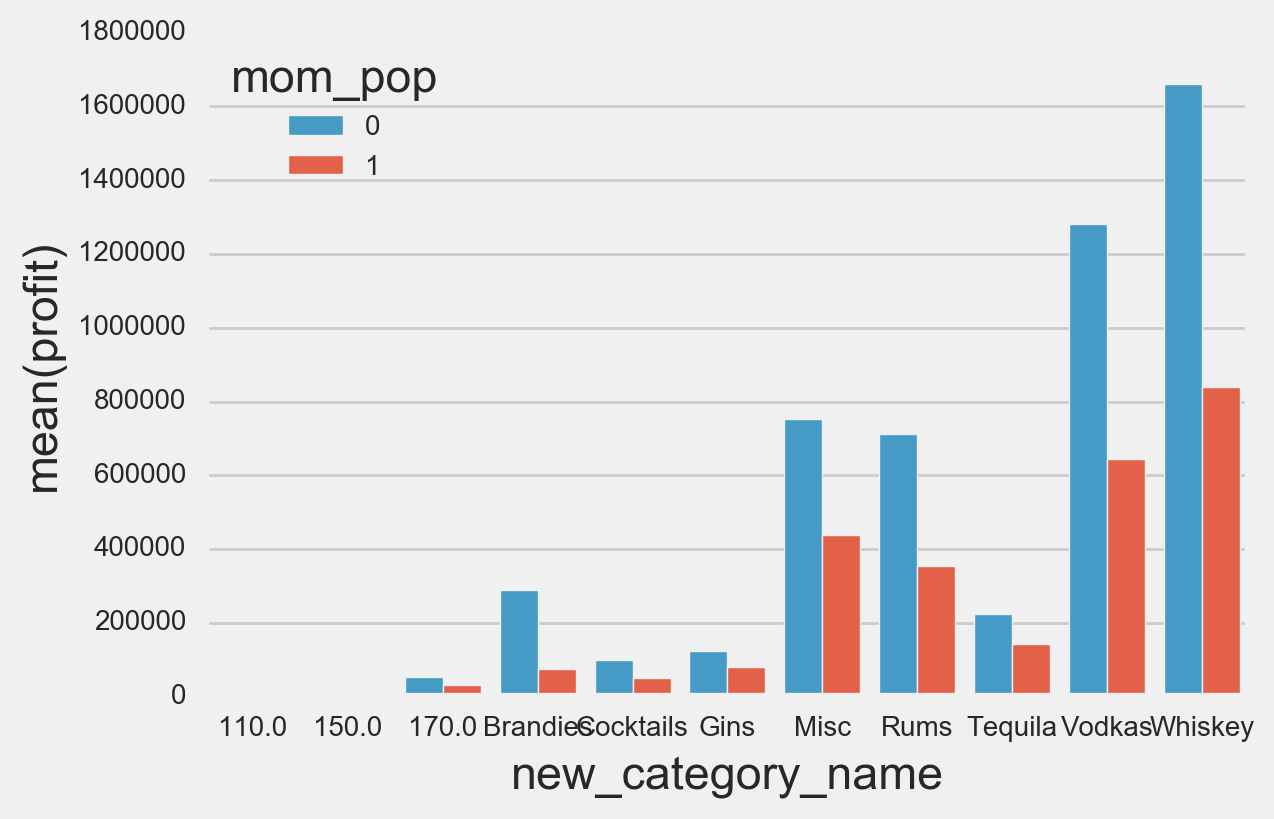

In [553]:
print "Mom and Pop Stores have lower total profits of each category than non-mom and pop stores"
mom_pop_comparisons_sum("profit")



mom and pop stores sell less bottles of each category


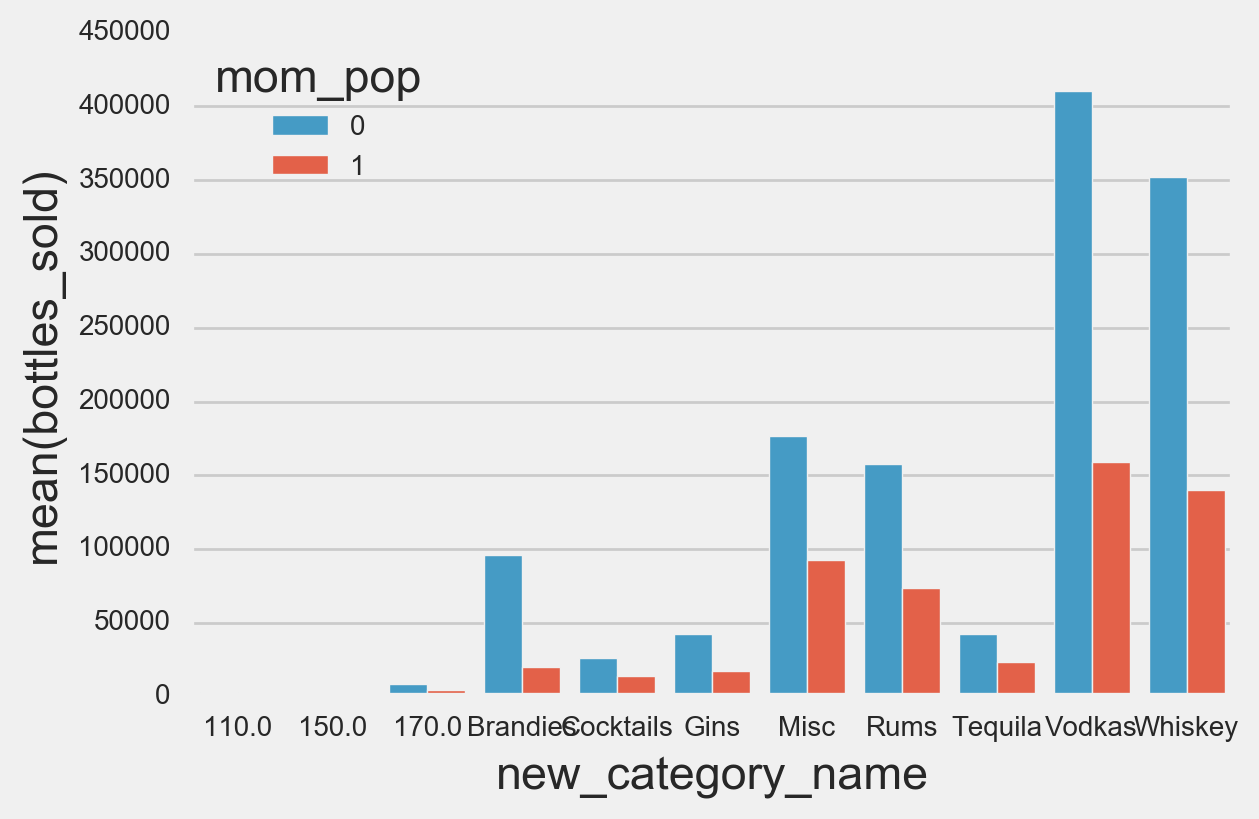

In [554]:
print "mom and pop stores sell less bottles of each category"
mom_pop_comparisons_sum("bottles_sold")



For gins, tequila, and brandie, mom and pop stores sell smaller bottles


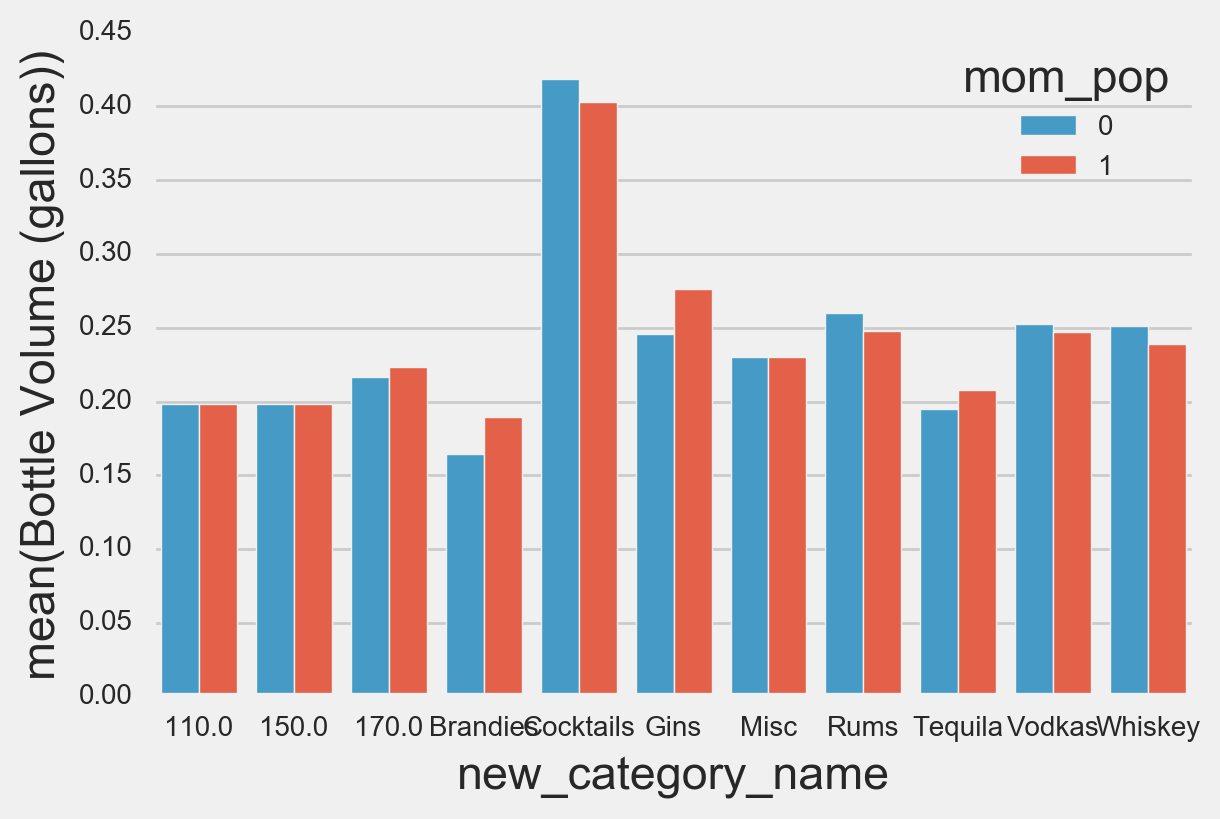

In [556]:
def mom_pop_comparisons_mean(x):
    mom_pop_comparison=iowa_2015.groupby(["new_category_name","mom_pop"])[x].mean().reset_index()
    sns.barplot(x="new_category_name", y=x, hue="mom_pop", data=mom_pop_comparison)

    print "For gins, tequila, and brandie, mom and pop stores sell smaller bottles"
mom_pop_comparisons_mean("Bottle Volume (gallons)")

In [250]:
#On average non-mom-and-pop stores sell more bottles of rum, tequila, vodka, and whiskey. Mom and
#pop stores sell more bottles of Brandie
#On average, non-mom-and-pop sotres sell more bottles of Brandie, and Gin per sale.


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
#Relationship between store size and category of liquor. 
#Categorize store size as mom and pop and large stores.
#How would we categorize mom and pop and large stores
#Tax proportional to volume sold. Higher volumes sold get a higher tax rate.

#From my EDA, I conclude that an efficient tax policy would be to levy a tax that is proportional to the 
#total number of bottles sold. I do not propose a tax on volume sold because non-mom-and-pop stores
#on average sell bottles that have higher volume. A tax on bottles sold will not explicitely target
#super market stores or mom-and-pop stores.

From my EDA, I conclude that an efficient tax policy would be to levy a tax that is proportional to the total number of bottles sold. I do not propose a tax on volume sold because non-mom-and-pop stores on average sell bottles that have higher volume. A tax on bottles sold will not explicitely target super market stores or mom-and-pop stores.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [558]:
#How do we make columns for Q1 2015 and Q2 2016?
#Make mask? Make column for sales Q1 2015 and sales Q1 2016.
iowa_a=pd.merge(iowa, iowa_months2, on='Store Number', how='left')



In [559]:
iowa_a=iowa_a[iowa_a["problem_stores"]==0.0]
#Get rid of problem stores

In [560]:
iowa_a_2015=iowa_a[iowa_a["year_2015"]==1]
#Get only year 2015

In [562]:
iowa_a_2015

,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,bottle_cost,bottle_price,bottles_sold,revenue,gallons_sold,Bottle Volume (gallons),total_gallons_sold,Month_x,Year,year_2015,Month_y,problem_stores
0,11/04/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,12,81.00,2.38,0.198129,230.40,11,2015,1,78.0,0.0
4,08/18/2015,3654,99.0,Wright,1031080.0,VODKA 80 PROOF,297,7.20,10.80,12,129.60,5.55,0.462301,271.81,8,2015,1,78.0,0.0
5,04/20/2015,2569,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,13.32,19.98,6,119.88,2.77,0.462301,1144.51,4,2015,1,78.0,0.0
6,08/05/2015,2596,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,29.97,0.59,0.198129,791.88,8,2015,1,78.0,0.0
7,06/25/2015,3456,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,15.75,23.63,2,47.26,0.92,0.462301,1500.75,6,2015,1,78.0,0.0
9,11/10/2015,4346,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,7.62,11.43,2,22.86,0.53,0.264172,240.47,11,2015,1,78.0,0.0
10,09/28/2015,2648,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,26.24,39.36,6,236.16,1.19,0.198129,2926.68,9,2015,1,78.0,0.0
11,10/28/2015,2600,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,6.00,9.25,6,55.50,2.77,0.462301,566.76,10,2015,1,78.0,0.0
12,01/22/2015,3858,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,8.92,13.38,1,13.38,0.46,0.462301,483.31,1,2015,1,78.0,0.0
14,06/10/2015,3717,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,4.50,6.75,4,27.00,0.79,0.198129,230.40,6,2015,1,78.0,0.0


In [576]:
iowa_a_2015_jan=iowa_a_2015[iowa_a_2015["Month_x"]==1]

iowa_a_2015_jan["total_rev_jan"]=iowa_a_2015_jan["bottle_price"]*iowa_a_2015_jan["bottles_sold"]
iowa_a_2015_jan["total_cost_jan"]=iowa_a_2015_jan["bottle_cost"]*iowa_a_2015_jan["bottles_sold"]
iowa_a_2015_jan["profit_jan"]=iowa_a_2015_jan["total_rev_jan"]-iowa_a_2015_jan["total_cost_jan"]
iowa_a_2015_jan_counties=iowa_a_2015_jan.groupby(["County"])["total_rev_jan"]
iowa_a_2015_jan_counties=iowa_a_2015_jan.groupby(["County"])["total_rev_jan"].sum().reset_index()

iowa_a_2015_feb=iowa_a_2015[iowa_a_2015["Month_x"]==2]

iowa_a_2015_feb["total_rev_feb"]=iowa_a_2015_feb["bottle_price"]*iowa_a_2015_feb["bottles_sold"]
iowa_a_2015_feb["total_cost_feb"]=iowa_a_2015_feb["bottle_cost"]*iowa_a_2015_feb["bottles_sold"]
iowa_a_2015_feb["profit_feb"]=iowa_a_2015_feb["total_rev_feb"]-iowa_a_2015_feb["total_cost_feb"]
iowa_a_2015_feb_counties=iowa_a_2015_feb.groupby(["County"])["total_rev_feb"].sum().reset_index()

iowa_a_2015_mar=iowa_a_2015[iowa_a_2015["Month_x"]==3]

iowa_a_2015_mar["total_rev_march"]=iowa_a_2015_mar["bottle_price"]*iowa_a_2015_mar["bottles_sold"]
iowa_a_2015_mar["total_cost_march"]=iowa_a_2015_mar["bottle_cost"]*iowa_a_2015_mar["bottles_sold"]
iowa_a_2015_mar["profit_march"]=iowa_a_2015_mar["total_rev_march"]-iowa_a_2015_mar["total_cost_march"]
iowa_a_2015_mar_counties=iowa_a_2015_mar.groupby(["County"])["total_rev_march"].sum().reset_index()

iowa_counties_2015=pd.merge(iowa_a_2015_jan_counties, iowa_a_2015_feb_counties, on='County', how='left')
iowa_counties_2015=pd.merge(iowa_counties, iowa_a_2015_mar_counties, on='County', how='left')


iowa_counties_2015["Q1_sales"]=iowa_counties["total_rev_jan"]+iowa_counties["total_rev_feb"]+iowa_counties["total_rev_march"]



/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [164]:
def profit(df):
    df["total_rev_jan"]=df["bottle_price"]*df["bottles_sold"]
    df["total_cost_jan"]=df["bottle_cost"]*df["bottles_sold"]
    df["profit_jan"]=df["total_rev_jan"]-df["total_cost_jan"]

In [577]:
iowa_a_2016=iowa_a[iowa_a["year_2015"]==0]
iowa_a_2016_jan=iowa_a_2016[iowa_a_2016["Month_x"]==1]

iowa_a_2016_jan["total_rev_jan"]=iowa_a_2016_jan["bottle_price"]*iowa_a_2016_jan["bottles_sold"]
iowa_a_2016_jan["total_cost_jan"]=iowa_a_2016_jan["bottle_cost"]*iowa_a_2016_jan["bottles_sold"]
iowa_a_2016_jan["profit_jan"]=iowa_a_2016_jan["total_rev_jan"]-iowa_a_2016_jan["total_cost_jan"]
iowa_a_2016_jan_counties=iowa_a_2016_jan.groupby(["County"])["total_rev_jan"].sum().reset_index()


iowa_a_2016_feb=iowa_a_2016[iowa_a_2016["Month_x"]==2]

iowa_a_2016_feb["total_rev_feb"]=iowa_a_2016_feb["bottle_price"]*iowa_a_2016_feb["bottles_sold"]
iowa_a_2016_feb["total_cost_feb"]=iowa_a_2016_feb["bottle_cost"]*iowa_a_2016_feb["bottles_sold"]
iowa_a_2016_feb["profit_feb"]=iowa_a_2016_feb["total_rev_feb"]-iowa_a_2016_feb["total_cost_feb"]
iowa_a_2016_feb_counties=iowa_a_2016_feb.groupby(["County"])["total_rev_feb"].sum().reset_index()

iowa_a_2016_mar=iowa_a_2016[iowa_a_2016["Month_x"]==3]

iowa_a_2016_mar["total_rev_march"]=iowa_a_2016_mar["bottle_price"]*iowa_a_2016_mar["bottles_sold"]
iowa_a_2016_mar["total_cost_march"]=iowa_a_2016_mar["bottle_cost"]*iowa_a_2016_mar["bottles_sold"]
iowa_a_2016_mar["profit_march"]=iowa_a_2016_mar["total_rev_march"]-iowa_a_2016_mar["total_cost_march"]
iowa_a_2016_mar_counties=iowa_a_2016_mar.groupby(["County"])["total_rev_march"].sum().reset_index()

iowa_counties_2016=pd.merge(iowa_a_2016_jan_counties, iowa_a_2016_feb_counties, on='County', how='left')

iowa_counties_2016_a=pd.merge(iowa_counties_2016, iowa_a_2016_mar_counties, on='County', how='left')


iowa_counties_2016_a
iowa_counties_2016_a["Q1_sales_2016"]=iowa_counties_2016_a["total_rev_jan"]+iowa_counties_2016_a["total_rev_feb"]+iowa_counties_2016_a["total_rev_march"]

/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [578]:
iowa_counties_2016_a["Q1_sales_2016"]=iowa_counties_2016_a["total_rev_jan"]+iowa_counties_2016_a["total_rev_feb"]+iowa_counties_2016_a["total_rev_march"]

In [579]:
iowa_counties_sales_growth=pd.merge(iowa_counties_2015, iowa_counties_2016_a, on='County', how='left')



In [580]:
iowa_counties_sales_growth["sales_growth"]=((iowa_counties_sales_growth["Q1_sales_2016"]-iowa_counties_sales_growth["Q1_sales"])/iowa_counties_sales_growth["Q1_sales"])

In [584]:
top_growth=iowa_counties_sales_growth.sort_values("sales_growth", ascending=False).head()


Butler, Cedae, Worth, Crawford, and Fayette Counties are having the highest growth


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [586]:
print "Butler, Cedae, Worth, Crawford, and Fayette Counties are having the highest growth and the prospective store would best be placed in these counties"


top_growth.head()

Butler, Cedae, Worth, Crawford, and Fayette Counties are having the highest growth and the prospective store would best be placed in these counties


,County,total_rev_jan_x,total_rev_feb_x,total_rev_march_x,total_rev_march_y,Q1_sales,total_rev_jan_y,total_rev_feb_y,total_rev_march,Q1_sales_2016,sales_growth
10,Butler,961.68,639.50,1172.95,1172.95,2774.13,1826.63,3300.91,1415.46,6543.00,1.358577
14,Cedar,2311.51,3006.34,2651.21,2651.21,7969.06,2380.08,11988.81,2475.18,16844.07,1.113683
95,Worth,1672.71,1111.01,2661.51,2661.51,5445.23,1521.04,7571.51,1909.26,11001.81,1.020449
22,Crawford,6268.62,6326.08,6043.35,6043.35,18638.05,5680.59,24086.41,7862.67,37629.67,1.018970
31,Fayette,5127.00,4455.35,8323.96,8323.96,17906.31,8284.36,10472.84,12583.02,31340.22,0.750233


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

Butler, Cedae, Worth, Crawford, and Fayette Counties are having the highest growth and the prospective store would best be placed in these counties.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [613]:
#Groupby County sum sales by category
#What kind of liquor will give us the highest profit?


In [588]:
iowa_a["total_rev"]=iowa_a["bottle_price"]*iowa_a["bottles_sold"]
iowa_a["total_cost"]=iowa_a["bottle_cost"]*iowa_a["bottles_sold"]
iowa_a["profit"]=iowa_a["total_rev"]-iowa_a["total_cost"]


iowa_categories=iowa_a.groupby(["new_category_name"])["profit"].sum().reset_index()



In [589]:
iowa_categories

,new_category_name,profit
0,110,17885.36
1,150,22.26
2,170,32087.82
3,Brandies,401483.74
4,Cocktails,184365.29
5,Gins,251926.96
6,Misc,1239032.76
7,Rums,862483.97
8,Tequila,298262.42
9,Vodkas,1812708.16


In [591]:
def new_categories(var):
    var["new_category"]=var["Category"].apply(lambda x: (x/10000))
    var["new_category"]=np.round(var["new_category"])
    var[["Category", "new_category", "Category Name"]]
    var["new_category_name"]=var["new_category"].apply(lambda x: "Whiskey" if x ==101.0 else "Brandies" if x==105.0 else"Vodkas" if x==103.0 else "Gins" if x==104.0 else "Misc" if x==108.0 else "Tequila" if x==102.0 else "Cocktails" if x==107.0 else "Rums" if x==106.0 else x)

def group_cat(month,df):
    cat_month=df.groupby(["new_category_name"])["profit"].sum().reset_index()


def merge_months(df1,df2,new_df,key):
    new_df=pd.merge(df1, df2, on=key, how='left')



In [592]:
new_categories(iowa_a_2015_jan)
new_categories(iowa_a_2015_feb)
new_categories(iowa_a_2015_mar)

new_categories(iowa_a_2016_jan)
new_categories(iowa_a_2016_feb)
new_categories(iowa_a_2016_mar)






/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [594]:
cat_jan_2015=iowa_a_2015_jan.groupby(["new_category_name"])["profit_jan"].sum().reset_index()
cat_feb_2015=iowa_a_2015_feb.groupby(["new_category_name"])["profit_feb"].sum().reset_index()
cat_mar_2015=iowa_a_2015_mar.groupby(["new_category_name"])["profit_march"].sum().reset_index()

cat_profits_2015=pd.merge(cat_jan_2015, cat_feb_2015, on="new_category_name", how='left')
cat_profits_2015=pd.merge(cat_profits_2015, cat_mar_2015, on="new_category_name", how='left')






In [596]:
cat_profits_2015["profit_Q1_2015"]=cat_profits_2015["profit_jan"]+ cat_profits_2015["profit_feb"]+cat_profits_2015["profit_march"]
cat_profits_2015

,new_category_name,profit_jan,profit_feb,profit_march,profit_Q1_2015
0,110,1557.00,1288.38,1156.96,4002.34
1,170,2168.23,1378.90,3516.00,7063.13
2,Brandies,21094.47,24687.89,28884.40,74666.76
3,Cocktails,7585.34,11137.18,7941.34,26663.86
4,Gins,11924.28,11790.28,13927.65,37642.21
5,Misc,78752.44,76061.11,80413.35,235226.90
6,Rums,63317.74,69883.98,77450.10,210651.82
7,Tequila,21354.18,24277.84,28489.85,74121.87
8,Vodkas,114973.52,104892.77,139642.54,359508.83
9,Whiskey,143304.58,203088.49,178754.18,525147.25


In [597]:
cat_jan_2016=iowa_a_2016_jan.groupby(["new_category_name"])["profit_jan"].sum().reset_index()
cat_feb_2016=iowa_a_2016_feb.groupby(["new_category_name"])["profit_feb"].sum().reset_index()
cat_mar_2016=iowa_a_2016_mar.groupby(["new_category_name"])["profit_march"].sum().reset_index()



In [598]:
cat_profits_2016=pd.merge(cat_jan_2016, cat_feb_2016, on="new_category_name", how='left')
cat_profits_2016=pd.merge(cat_profits_2016, cat_mar_2016, on="new_category_name", how='left')
cat_profits_2016



,new_category_name,profit_jan,profit_feb,profit_march
0,110,929.18,1133.28,662.06
1,170,4081.95,932.73,1026.73
2,Brandies,20529.31,24597.79,30244.10
3,Cocktails,7083.69,8055.46,9944.23
4,Gins,11320.78,10710.99,14594.91
5,Misc,77490.39,91196.98,87315.64
6,Rums,58404.56,68931.27,74216.84
7,Tequila,18925.87,27120.43,26440.71
8,Vodkas,108639.39,123513.05,138742.68
9,Whiskey,139075.13,189217.48,177425.86


In [599]:
cat_profits_2016["profit_Q1_2016"]=cat_profits_2016["profit_jan"]+ cat_profits_2016["profit_feb"]+cat_profits_2016["profit_march"]
cat_profit_growth=pd.merge(cat_profits_2016, cat_profits_2015, on="new_category_name", how='left')




In [600]:
cat_profit_growth["profit_growth"]=((cat_profit_growth["profit_Q1_2016"]-cat_profit_growth["profit_Q1_2015"])/cat_profit_growth["profit_Q1_2015"])
cat_profit_growth

,new_category_name,profit_jan_x,profit_feb_x,profit_march_x,profit_Q1_2016,profit_jan_y,profit_feb_y,profit_march_y,profit_Q1_2015,profit_growth
0,110,929.18,1133.28,662.06,2724.52,1557.00,1288.38,1156.96,4002.34,-0.319268
1,170,4081.95,932.73,1026.73,6041.41,2168.23,1378.90,3516.00,7063.13,-0.144655
2,Brandies,20529.31,24597.79,30244.10,75371.20,21094.47,24687.89,28884.40,74666.76,0.009434
3,Cocktails,7083.69,8055.46,9944.23,25083.38,7585.34,11137.18,7941.34,26663.86,-0.059274
4,Gins,11320.78,10710.99,14594.91,36626.68,11924.28,11790.28,13927.65,37642.21,-0.026978
5,Misc,77490.39,91196.98,87315.64,256003.01,78752.44,76061.11,80413.35,235226.90,0.088324
6,Rums,58404.56,68931.27,74216.84,201552.67,63317.74,69883.98,77450.10,210651.82,-0.043195
7,Tequila,18925.87,27120.43,26440.71,72487.01,21354.18,24277.84,28489.85,74121.87,-0.022056
8,Vodkas,108639.39,123513.05,138742.68,370895.12,114973.52,104892.77,139642.54,359508.83,0.031672
9,Whiskey,139075.13,189217.48,177425.86,505718.47,143304.58,203088.49,178754.18,525147.25,-0.036997


In [602]:
cat_profit_growth.sort_values("profit_growth", ascending=False).head()
Should focus on Vodkas

,new_category_name,profit_jan_x,profit_feb_x,profit_march_x,profit_Q1_2016,profit_jan_y,profit_feb_y,profit_march_y,profit_Q1_2015,profit_growth
5,Misc,77490.39,91196.98,87315.64,256003.01,78752.44,76061.11,80413.35,235226.90,0.088324
8,Vodkas,108639.39,123513.05,138742.68,370895.12,114973.52,104892.77,139642.54,359508.83,0.031672
2,Brandies,20529.31,24597.79,30244.10,75371.20,21094.47,24687.89,28884.40,74666.76,0.009434
7,Tequila,18925.87,27120.43,26440.71,72487.01,21354.18,24277.84,28489.85,74121.87,-0.022056
4,Gins,11320.78,10710.99,14594.91,36626.68,11924.28,11790.28,13927.65,37642.21,-0.026978


Should focus on miscellaneuous and vodkas. I will focus on vodkas for the sake of clear interpretation.

In [603]:
#Find counties with highest growth of vodkas
#Make a mask of just the vodka category in master, then split to 2015, and 2016. Profit for 2015 Q1, and 2016 Q1
#Find county with highest growth


vodka_2015_jan=iowa_a_2015_jan[iowa_a_2015_jan["new_category_name"]=="Vodkas"]
vodka_2015_feb=iowa_a_2015_feb[iowa_a_2015_feb["new_category_name"]=="Vodkas"]
vodka_2015_mar=iowa_a_2015_mar[iowa_a_2015_mar["new_category_name"]=="Vodkas"]


vodka_2016_jan=iowa_a_2016_jan[iowa_a_2016_jan["new_category_name"]=="Vodkas"]
vodka_2016_feb=iowa_a_2016_feb[iowa_a_2016_feb["new_category_name"]=="Vodkas"]
vodka_2016_mar=iowa_a_2016_mar[iowa_a_2016_mar["new_category_name"]=="Vodkas"]

# vodka_2015_jan=vodka_growth(iowa_a_2015_jan)
# vodka_2015_feb=vodka_growth(iowa_a_2015_feb)
# vodka_2015_mar=vodka_growth(iowa_a_2015_mar)
# vodka_2016_jan=vodka_growth(iowa_a_2016_jan)
# vodka_2016_feb=vodka_growth(iowa_a_2016_feb)
# vodka_2016_mar=vodka_growth(iowa_a_2016_mar)


In [604]:
vodka_jan_2015=vodka_2015_jan.groupby(["County"])["profit_jan"].sum().reset_index()
vodka_feb_2015=vodka_2015_feb.groupby(["County"])["profit_feb"].sum().reset_index()
vodka_mar_2015=vodka_2015_mar.groupby(["County"])["profit_march"].sum().reset_index()

vodka_jan_2016=vodka_2016_jan.groupby(["County"])["profit_jan"].sum().reset_index()
vodka_feb_2016=vodka_2016_feb.groupby(["County"])["profit_feb"].sum().reset_index()
vodka_mar_2016=vodka_2016_mar.groupby(["County"])["profit_march"].sum().reset_index()




In [605]:
vodka_profits_2015=pd.merge(vodka_jan_2015, vodka_feb_2015, on="County", how='left')
vodka_profits_2015=pd.merge(vodka_profits_2015, vodka_mar_2015, on="County", how='left')


In [606]:
vodka_profits_2016=pd.merge(vodka_jan_2016, vodka_feb_2016, on="County", how='left')
vodka_profits_2016=pd.merge(vodka_profits_2016, vodka_mar_2016, on="County", how='left')




In [607]:
vodka_growth=pd.merge(vodka_profits_2015, vodka_mar_2016, on="County", how='left')
vodka_profits_2015["profit_Q1_2015"]=vodka_profits_2015["profit_jan"]+ vodka_profits_2015["profit_feb"]+vodka_profits_2015["profit_march"]
vodka_profits_2016["profit_Q1_2016"]=vodka_profits_2016["profit_jan"]+ vodka_profits_2016["profit_feb"]+vodka_profits_2016["profit_march"]



In [608]:
vodka_growth_counties=pd.merge(vodka_profits_2015, vodka_profits_2016, on="County", how='left')




In [610]:
vodka_growth_counties["growth_profits"]=((vodka_growth_counties["profit_Q1_2016"]-vodka_growth_counties["profit_Q1_2015"])/vodka_growth_counties["profit_Q1_2015"])

In [612]:
vodka_growth_counties.sort_values("growth_profits", ascending=False).head()

,County,profit_jan_x,profit_feb_x,profit_march_x,profit_Q1_2015,profit_jan_y,profit_feb_y,profit_march_y,profit_Q1_2016,growth_profits
31,Fayette,269.69,170.59,302.75,743.03,722.48,316.39,1450.92,2489.79,2.350861
86,Van Buren,33.42,25.10,16.20,74.72,51.50,112.05,33.75,197.30,1.640525
43,Humboldt,131.47,97.84,421.62,650.93,339.48,312.66,934.02,1586.16,1.436760
53,Lee,966.34,1298.95,1412.11,3677.40,2797.64,2141.88,3544.48,8484.00,1.307065
10,Butler,64.54,28.36,121.32,214.22,177.54,223.44,32.50,433.48,1.023527


Vodka profits have grown the most for the Fayette county. The store should be located there and focus on vodka.